In [1]:
import pandas as pd
import seaborn as sns
import datetime
import calendar
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

In [2]:
transactions = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name=1, skiprows=1)
cust_demo = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name=3, skiprows=1)
cust_addr = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name=4, skiprows=1)

C:\Users\joyal\AppData\Local\Temp/ipykernel_644/2171676663.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  cust_demo = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name=3, skiprows=1)


In [5]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [55]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [56]:
transactions.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                       object
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [7]:
transactions.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [4]:
transactions['online_order'] = transactions['online_order'].replace({0.0: 'False', 1.0: 'True'})

In [5]:
transactions.dropna().shape

(19445, 13)

In [6]:
transactions.dropna(inplace=True)

In [16]:
(1 - 19445/20000)*100

2.7750000000000052

In [71]:
transactions.agg(['max', 'min', 'nunique', 'unique'])

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
max,20000,100,5034,2017-12-30 00:00:00,True,Cancelled,WeareA2B,Touring,medium,small,2091.47,1759.85,42710.0
min,1,0,1,2017-01-01 00:00:00,False,Approved,Giant Bicycles,Mountain,high,large,12.01,7.21,33259.0
nunique,19445,101,3492,364,2,2,6,4,3,3,100,103,100
unique,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2, 3, 37, 88, 78, 25, 22, 15, 67, 12, 5, 61, ...","[2950, 3120, 402, 3135, 787, 2339, 1542, 2459,...","[2017-02-25T00:00:00.000000000, 2017-05-21T00:...","[False, True]","[Approved, Cancelled]","[Solex, Trek Bicycles, OHM Cycles, Norco Bicyc...","[Standard, Road, Mountain, Touring]","[medium, low, high]","[medium, large, small]","[71.49, 2091.47, 1793.43, 1198.46, 1765.3, 153...","[53.62, 388.92, 248.82, 381.1, 709.48, 829.65,...","[41245.0, 41701.0, 36361.0, 36145.0, 42226.0, ..."


In [8]:
cust_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [8]:
cust_demo.shape

(4000, 13)

In [194]:
cust_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [30]:
cust_demo.isna().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
Age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [36]:
cust_demo = cust_demo[~(cust_demo.Age == 179)]

In [11]:
cust_demo.drop(['first_name', 'last_name'], axis = 1, inplace =True)

In [12]:
cust_demo["Age"] = (datetime.datetime.now() - cust_demo["DOB"]).astype('<m8[Y]')
age = cust_demo.pop("Age")
cust_demo.insert(4, "Age", age)

In [13]:
cust_demo.drop(['DOB'], axis = 1, inplace =True)

In [14]:
cust_demo.drop(['default'], axis = 1, inplace =True)

In [17]:
cust_demo.gender.value_counts()

Female    2127
Male      1873
Name: gender, dtype: int64

In [16]:
cust_demo['gender'] = cust_demo.gender.replace({'F': 'Female', 'M': 'Male', 'Femal':'Female', 'U': 'Female'})

**Dropping the rows where age and tenure is null**

In [19]:
cust_demo = cust_demo[~cust_demo.Age.isna()]

In [153]:
cust_demo[~cust_demo.job_industry_category.isna()].drop(['job_title', 'customer_id'], axis = 1).to_csv("Cust_demo_jobcategory_train.csv", index=False)

**Job related columns have to be imputed**

In [22]:
cust_demo[~cust_demo.job_industry_category.isna() & cust_demo.job_title.isna()].job_industry_category.unique()

array(['IT', 'Retail', 'Financial Services', 'Property', 'Manufacturing',
       'Health', 'Argiculture', 'Telecommunications', 'Entertainment'],
      dtype=object)

In [23]:
job_titles_ind_isna = list(cust_demo[cust_demo.job_industry_category.isna() & ~cust_demo.job_title.isna()].job_title.unique())

In [24]:
title_indina_map = {}
for title in job_titles_ind_isna:
    title_indina_map.update({title: cust_demo[cust_demo.job_title == title].job_industry_category.value_counts().index[0]})
title_indina_map

{'Senior Editor': 'Manufacturing',
 'Media Manager I': 'Retail',
 'Media Manager IV': 'Financial Services',
 'Sales Associate': 'Financial Services',
 'Professor': 'Financial Services',
 'Product Engineer': 'Manufacturing',
 'VP Quality Control': 'Financial Services',
 'Biostatistician II': 'Manufacturing',
 'Chief Design Engineer': 'Manufacturing',
 'Physical Therapy Assistant': 'Financial Services',
 'Information Systems Manager': 'Health',
 'Web Developer II': 'Manufacturing',
 'Teacher': 'Financial Services',
 'Accountant III': 'Manufacturing',
 'Analyst Programmer': 'Financial Services',
 'Marketing Assistant': 'Retail',
 'Staff Scientist': 'Manufacturing',
 'Budget/Accounting Analyst IV': 'Manufacturing',
 'Associate Professor': 'Manufacturing',
 'Programmer Analyst III': 'Manufacturing',
 'Junior Executive': 'Manufacturing',
 'Internal Auditor': 'Manufacturing',
 'Structural Engineer': 'Manufacturing',
 'Help Desk Operator': 'Property',
 'Statistician I': 'Financial Services',
 

In [1059]:
cust_demo['job_industry_category'].nunique()

9

In [25]:
def job_industry(x):
    if x['job_industry_category'] != x['job_industry_category']:
        if x['job_title'] in title_indina_map.keys():
            return title_indina_map[x['job_title']]
    return x['job_industry_category']


cust_demo['job_industry_category'] = cust_demo.apply(job_industry, axis = 1)

C:\Users\joyal\AppData\Local\Temp/ipykernel_644/92216905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_demo['job_industry_category'] = cust_demo.apply(job_industry, axis = 1)


In [27]:
# cust_demo[cust_demo.job_title.isna() & (cust_demo.job_industry_category == "IT")]['job_title'] = "Business Systems Development Analyst"
def job_title(x):
    if x['job_title'] != x['job_title']:
        if x['job_industry_category'] == "IT":
            return "Business Systems Development Analyst"
        elif x['job_industry_category'] == "Retail":
            return "Sales Representative"
        elif x['job_industry_category'] == "Financial Services":
            return "Cost Accountant"
        elif x['job_industry_category'] == "Property":
            return "Account Coordinator"
        elif x['job_industry_category'] == "Manufacturing":
            return "Chemical Engineer"
        elif x['job_industry_category'] == "Health":
            return "Social Worker"
        elif x['job_industry_category'] == "Argiculture":
            return "Executive Secretary"
        elif x['job_industry_category'] == "Telecommunications":
            return "Tax Accountant"
        elif x['job_industry_category'] == "Entertainment":
            return "Assistant Media Planner"
    
    return x['job_title']
            


# cust_demo[["job_industry_category"]] = cust_demo.apply(job_industry, axis = 1)
cust_demo['job_title'] = cust_demo.apply(job_title, axis = 1)

C:\Users\joyal\AppData\Local\Temp/ipykernel_644/1369302251.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_demo['job_title'] = cust_demo.apply(job_title, axis = 1)


In [29]:
cust_demo.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [37]:
cust_demo.agg(['max', 'min', 'nunique', 'unique'])

,customer_id,gender,past_3_years_bike_related_purchases,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
max,4000,Male,99,91.0,Web Developer IV,Telecommunications,Mass Customer,Y,Yes,22.0
min,1,Female,0,21.0,Account Coordinator,Argiculture,Affluent Customer,N,No,1.0
nunique,3807,2,100,53,195,9,3,2,2,22
unique,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Female, Male]","[93, 81, 61, 33, 56, 35, 6, 31, 97, 49, 99, 58...","[69.0, 42.0, 61.0, 45.0, 56.0, 47.0, 60.0, 50....","[Executive Secretary, Administrative Officer, ...","[Health, Financial Services, Property, IT, Man...","[Mass Customer, Affluent Customer, High Net Wo...","[N, Y]","[Yes, No]","[11.0, 16.0, 15.0, 7.0, 8.0, 13.0, 20.0, 9.0, ..."


In [25]:
cust_addr.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [38]:
cust_addr.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [288]:
cust_addr.dropna().agg(['max', 'min', 'nunique', 'unique'])

,customer_id,address,postcode,state,country,property_valuation
max,4003,9993 Mccormick Street,4883,VIC,Australia,12
min,1,0 3rd Road,2000,NSW,Australia,1
nunique,3999,3996,873,4,1,12
unique,"[1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...","[060 Morning Avenue, 6 Meadow Vale Court, 0 Ho...","[2016, 2153, 4211, 2448, 3216, 2210, 2650, 202...","[New South Wales, QLD, VIC, NSW]",[Australia],"[10, 9, 4, 12, 8, 6, 7, 3, 5, 11, 1, 2]"


In [39]:
cust_addr.shape

(3999, 6)

In [40]:
cust_addr['state'] = cust_addr.state.replace({'Victoria':'VIC', 'New South Wales': 'NSW'})

In [41]:
cust_addr.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [42]:
combined_df = (transactions.merge(cust_demo, on="customer_id")).merge(cust_addr, on="customer_id")

In [43]:
combined_df.shape

(18509, 27)

In [44]:
combined_df = combined_df[~(combined_df.Age == 179)]

In [185]:
for i in combined_df.columns:
    print(i)

transaction_id
product_id
customer_id
transaction_date
transaction_month
transaction_month_number
online_order
order_status
brand
product_line
product_class
product_size
list_price
standard_cost
gender
past_3_years_bike_related_purchases
Age
job_title
job_industry_category
wealth_segment
deceased_indicator
owns_car
tenure
address
postcode
state
property_valuation
Age_category


In [45]:
combined_df.drop('product_first_sold_date', inplace=True, axis = 1)

In [46]:
combined_df.drop('country', inplace=True, axis = 1)

In [47]:
combined_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,6
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,...,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,6
2,18923,62,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,...,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,6
3,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,5
4,6862,4,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,...,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,5


In [48]:
combined_df['transaction_date'] = pd.to_datetime(combined_df.transaction_date).dt.date
combined_df['transaction_month_number'] = pd.to_datetime(combined_df.transaction_date).dt.month
combined_df['transaction_month'] = combined_df['transaction_month_number'].apply(lambda x: calendar.month_abbr[x])
months = combined_df.pop("transaction_month")
months_no = combined_df.pop("transaction_month_number")
combined_df.insert(4, "transaction_month", months)
combined_df.insert(5, "transaction_month_number", months_no)

Text(0, 0.5, 'Number of transactions')

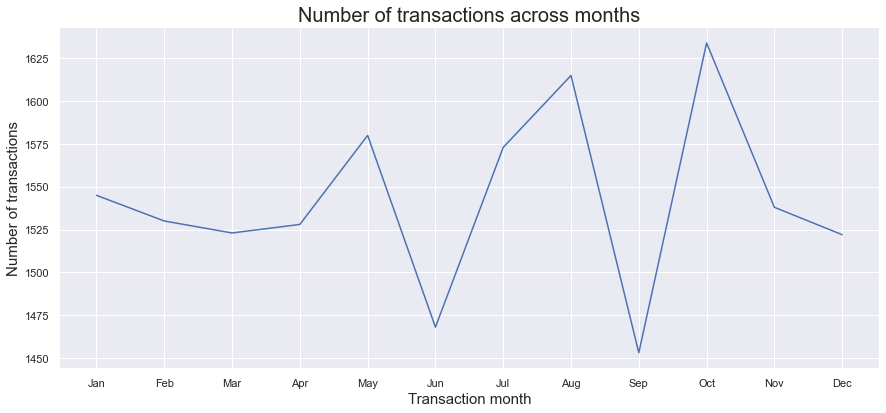

In [49]:

# plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(14.7,6.27)})
sns.lineplot(x = 'transaction_month', y = 'Age', data = combined_df[['transaction_month', 'Age', 'transaction_month_number']].groupby(['transaction_month', 'transaction_month_number']).count().reset_index().sort_values(by = 'transaction_month_number'))
plt.title("Number of transactions across months", fontsize=20)
plt.xlabel("Transaction month", fontsize=15)
plt.ylabel("Number of transactions", fontsize=15)

In [50]:
combined_df[['transaction_month', 'customer_id', 'Age']].groupby(['transaction_month', 'customer_id']).count().reset_index().sort_values(by = 'Age', ascending=False).head()

,transaction_month,customer_id,Age
4750,Feb,2932,6
11448,Nov,1103,6
1307,Aug,242,5
5567,Jan,1745,5
13868,Sep,718,5


No handles with labels found to put in legend.


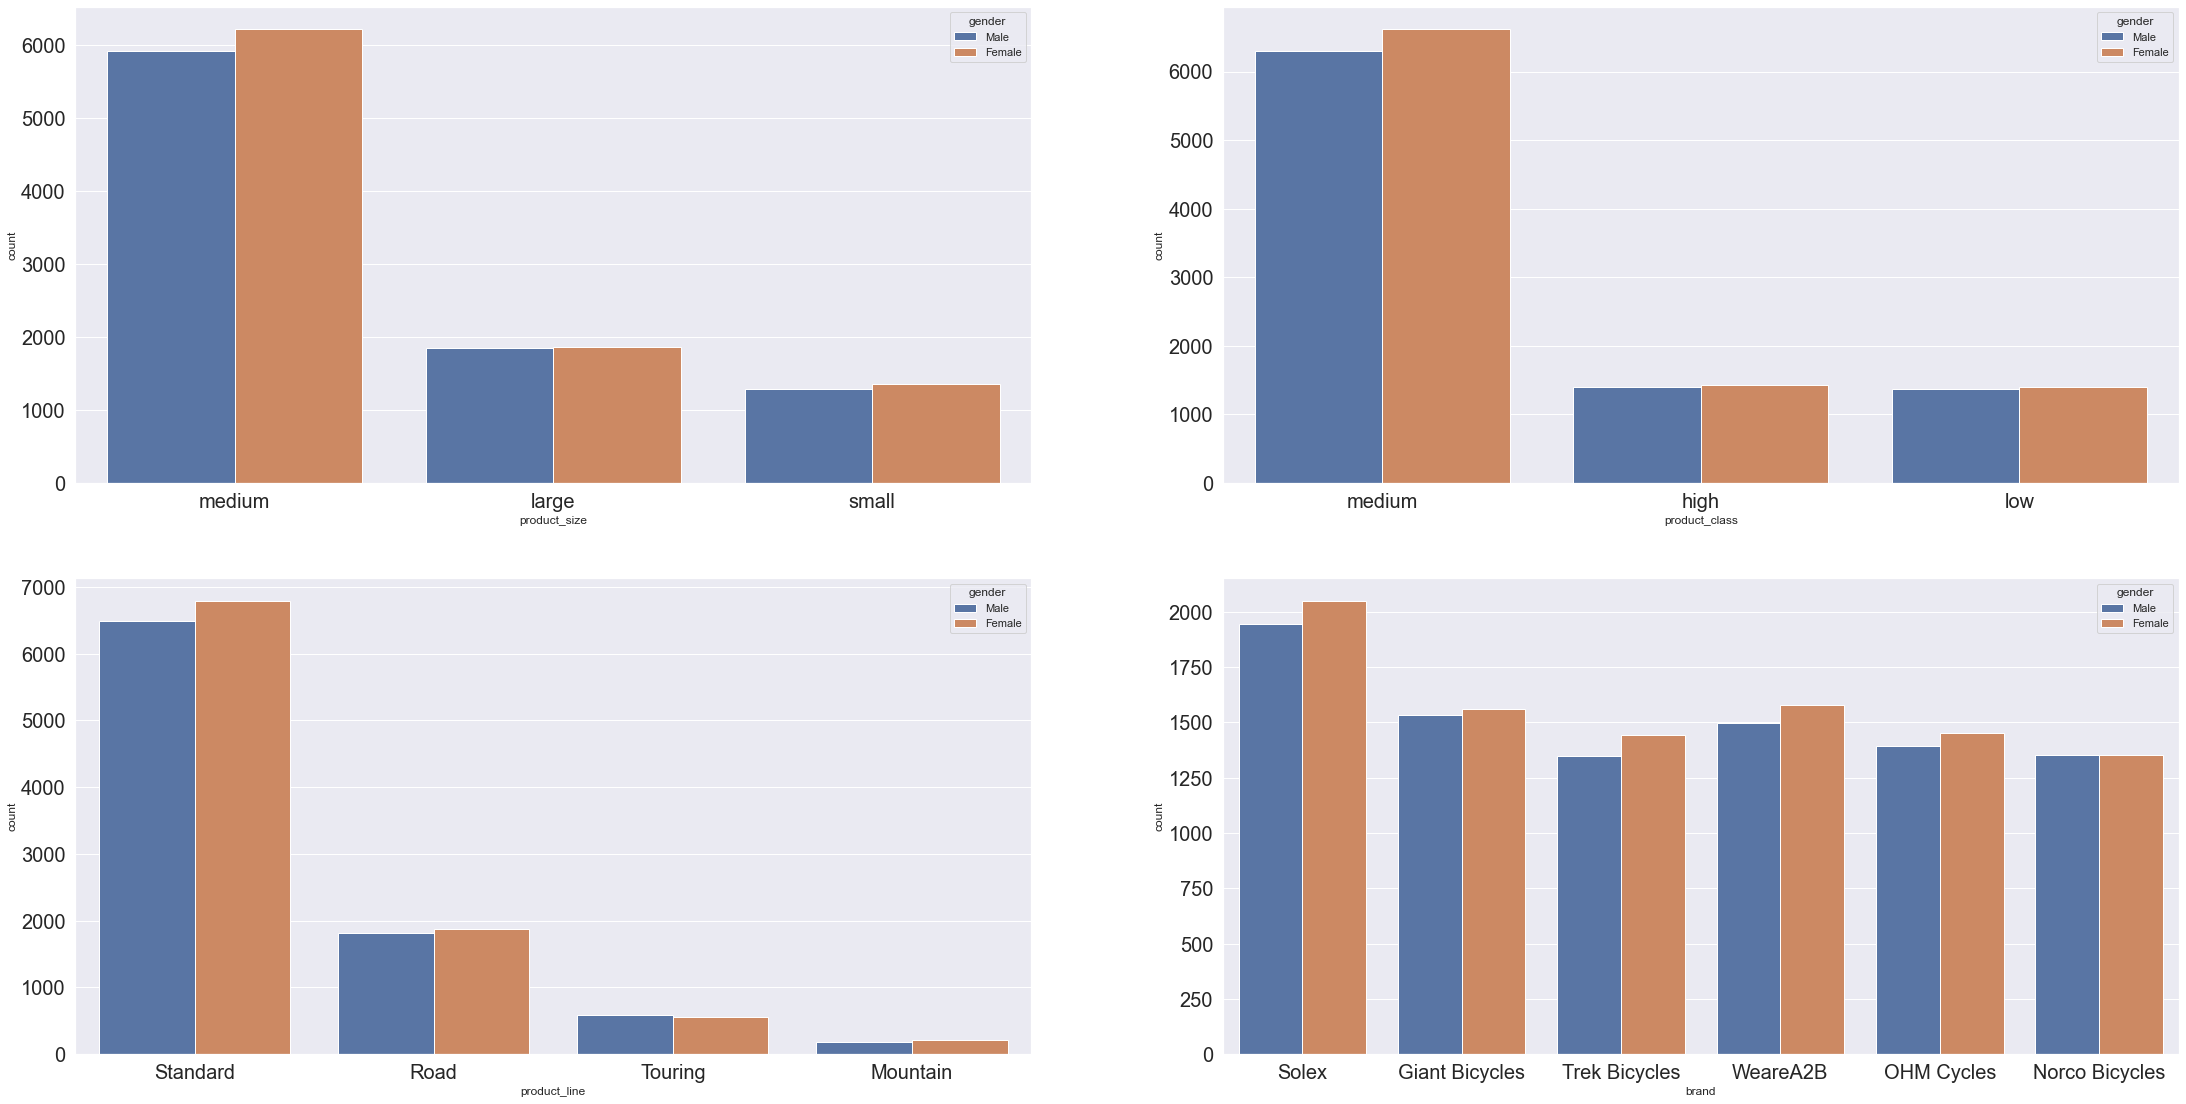

In [51]:
# plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(37.7,19.27)})
fig, axes = plt.subplots(2,2)
axes[0,0].tick_params(axis='both', labelsize=20)
axes[0,0].legend(prop={'size': 8})
axes[0,1].tick_params(axis='both', labelsize=20)
axes[1,0].tick_params(axis='both', labelsize=20)
axes[1,1].tick_params(axis='both', labelsize=20)
sns.countplot(x = 'product_size', data = combined_df, ax = axes[0,0], hue = 'gender');
sns.countplot(x = 'product_class', data = combined_df, ax = axes[0,1], hue = 'gender');
sns.countplot(x = 'product_line', data = combined_df, ax = axes[1,0], hue = 'gender');
sns.countplot(x = 'brand', data = combined_df, ax = axes[1,1],hue = 'gender');

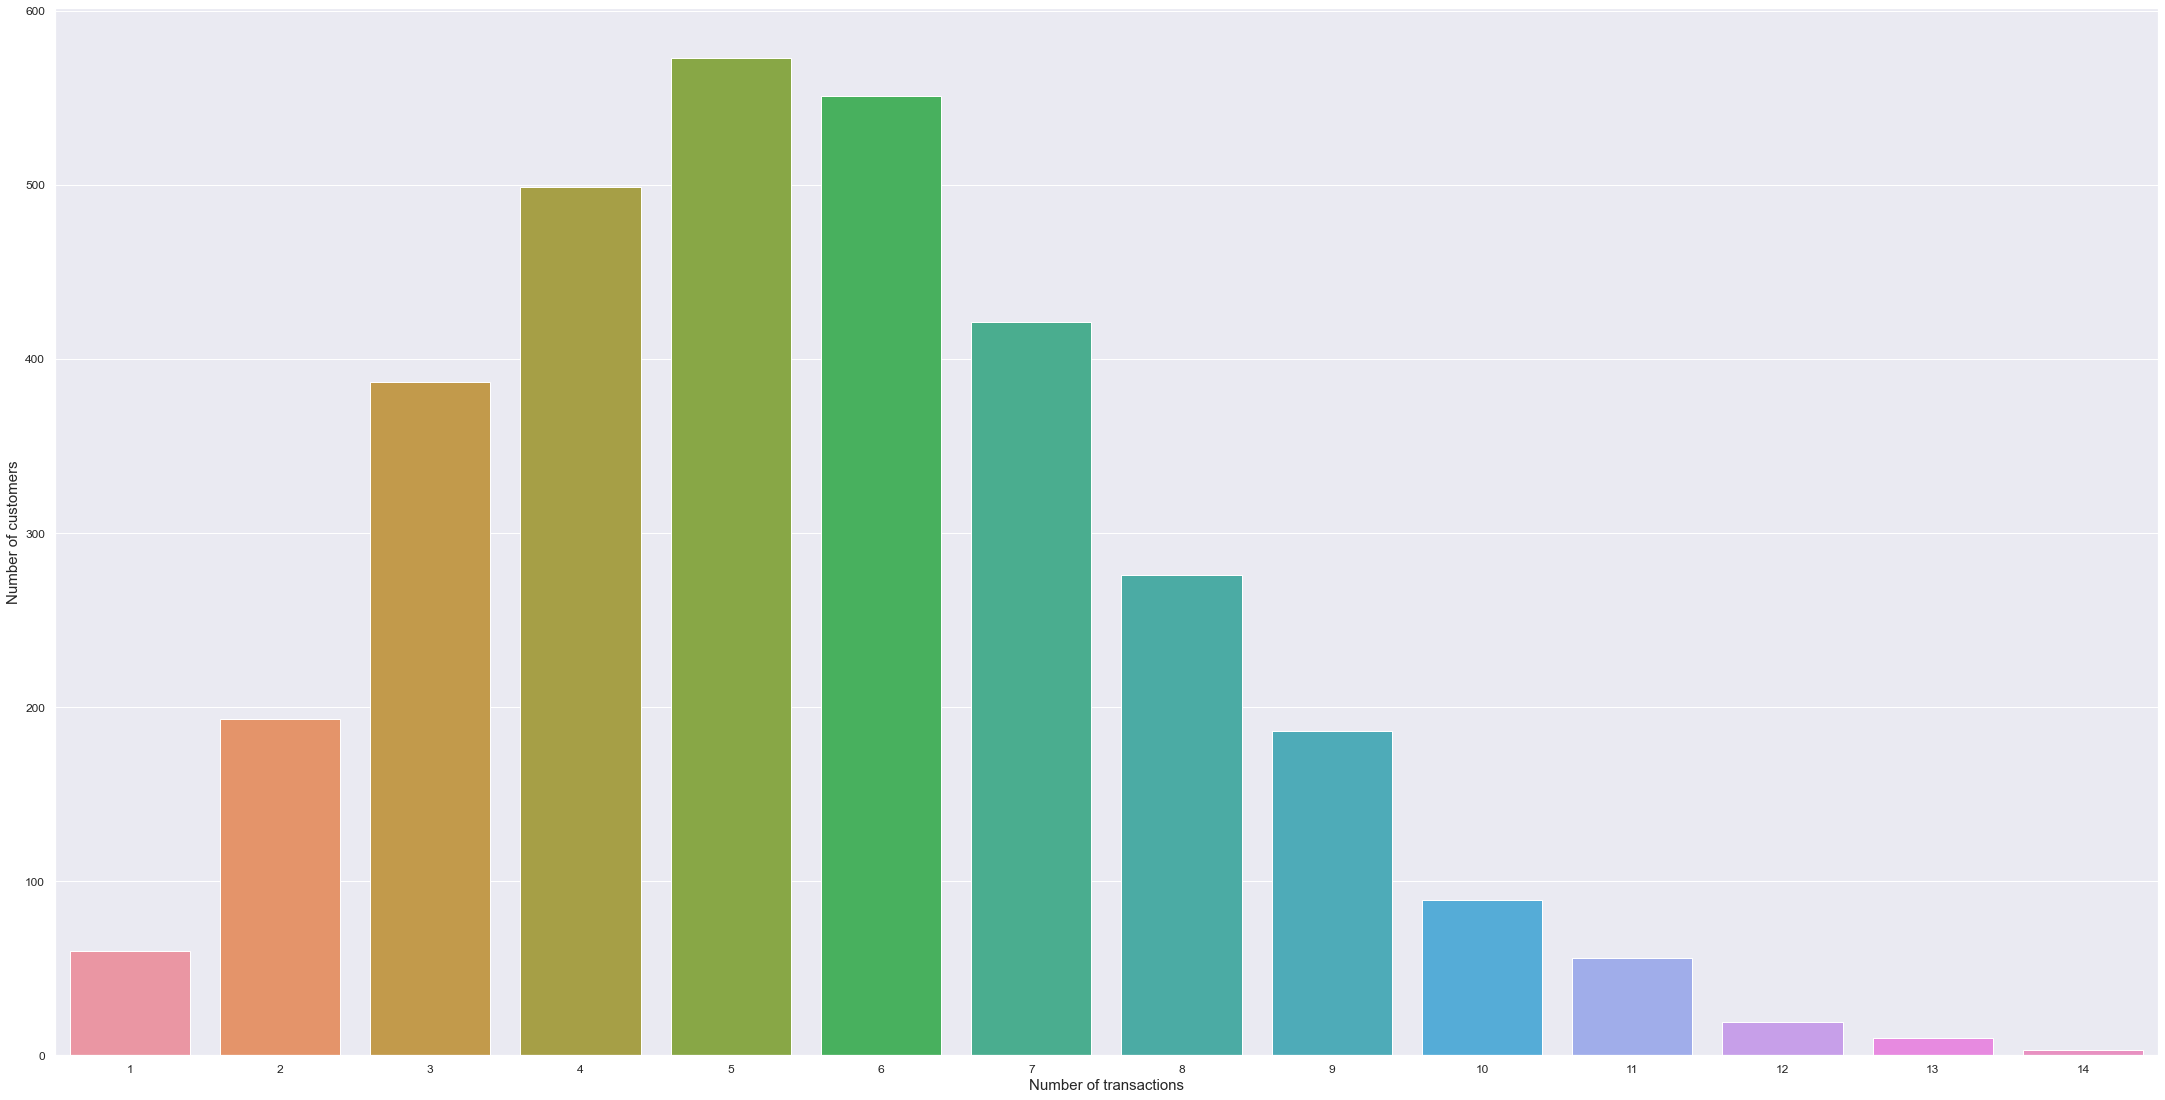

In [52]:
sns.countplot(x = 'transaction_id', data = combined_df.groupby('customer_id').count().reset_index()) 
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);
plt.xlabel('Number of transactions',fontsize=15);
plt.ylabel('Number of customers', fontsize=15);

If you see above the number of customers making the transactions in the range of 3 to 8 are more when compared with customers making large number of transactions or less number of transactions. This is following a normal distribution. Its better we understand the features of these customers so that the volume of sales and thereby the profit of the organisation will be on the rise.

<AxesSubplot:xlabel='product_id', ylabel='count'>

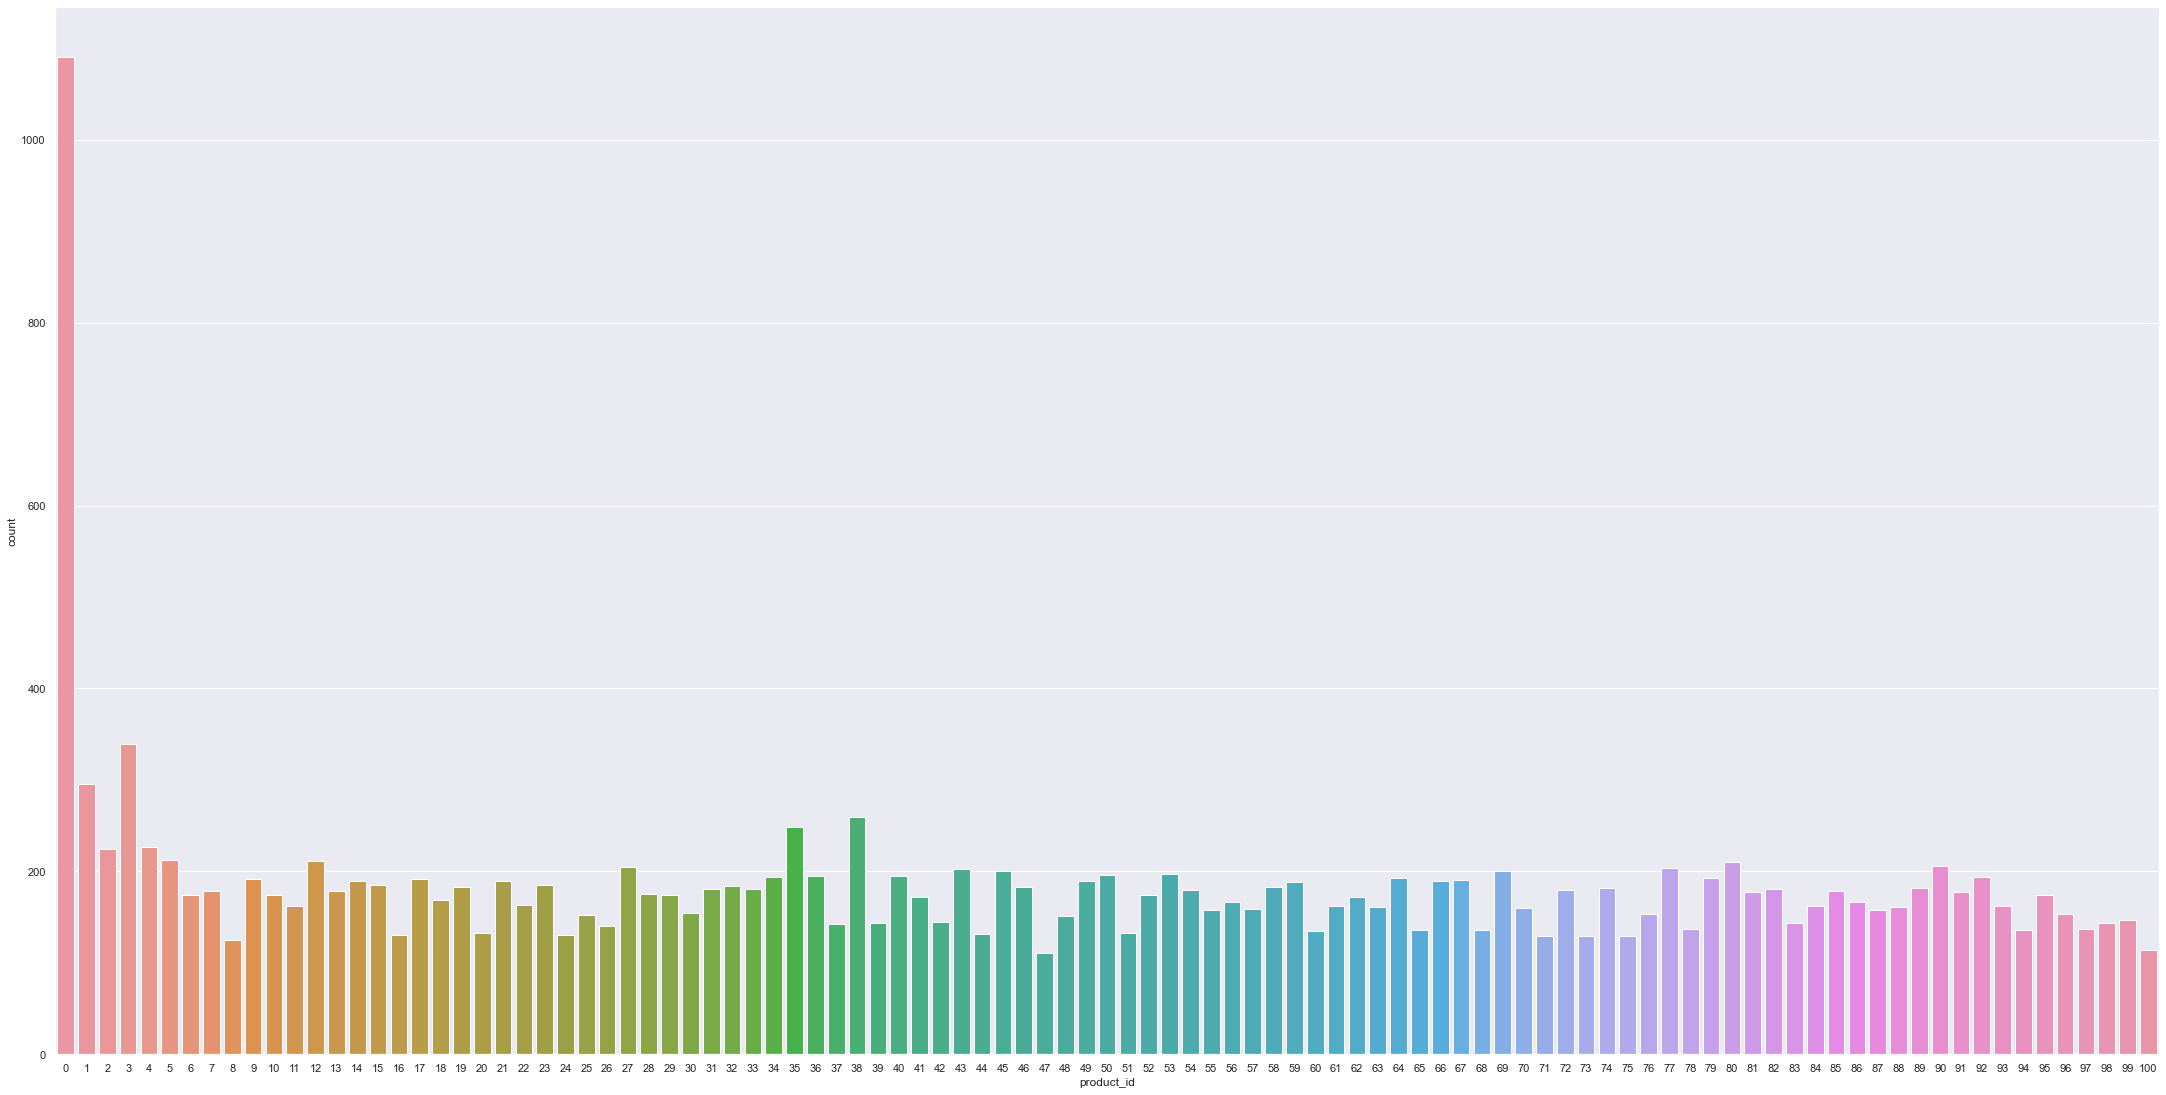

In [88]:
sns.countplot(x = 'product_id', data = combined_df) 

In [53]:
combined_df.order_status.value_counts()

Approved     18343
Cancelled      166
Name: order_status, dtype: int64

In [54]:
combined_df[combined_df.order_status == 'Cancelled'].groupby('customer_id').count().sort_values("transaction_id", ascending=False)

,transaction_id,product_id,transaction_date,transaction_month,transaction_month_number,online_order,order_status,brand,product_line,product_class,...,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation
customer_id,,,,,,,,,,,,,,,,,,,,,
2916,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1186,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2073,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2852,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
33,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1158,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1205,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [55]:
combined_df[(combined_df.order_status == 'Approved') & (combined_df.customer_id.isin([2916,1186,2073,2852]))].customer_id.value_counts()

2073    6
2916    5
1186    4
2852    4
Name: customer_id, dtype: int64

In [110]:
combined_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'transaction_month', 'transaction_month_number', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost', 'gender',
       'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state',
       'property_valuation', 'past_3_years_bike_related_purchases_categories',
       'Age_category', 'list_price_categories'],
      dtype='object')

In [107]:
def list_price_categories(price):
    categories =  ['Below 200', '201-400', '401-600', '601-800', '801-1000', '1001-1200', '1201-1400', '1401-1600', '1601-1800'
                 , '1801-2000', 'Above 2000']
    for index, category in enumerate(categories):
        values = re.findall('\d{3,4}', category)
        values = [int(value) for value in values]
        if (price <= 200) or (price >= 2000):
            if price <= values[0]:
                return categories[index]
            elif values[0] == 2000:
                return categories[index]
        
        if len(values) == 2:
            if values[0] <= price <= values[1]:
                return categories[index]
            
combined_df['list_price_categories'] = combined_df.list_price.apply(list_price_categories)

In [108]:
combined_df['list_price_categories'].value_counts()

1001-1200     2451
401-600       2377
1201-1400     2149
1601-1800     1961
1401-1600     1870
1801-2000     1859
601-800       1626
201-400       1362
Below 200     1278
Above 2000     807
801-1000       769
Name: list_price_categories, dtype: int64

In [109]:
combined_df[['list_price_categories', 'list_price']]

,list_price_categories,list_price
0,Below 200,71.49
1,1401-1600,1403.50
2,401-600,478.16
3,Above 2000,2091.47
4,1001-1200,1129.13
...,...,...
18504,201-400,227.88
18505,401-600,441.49
18506,Above 2000,2083.94
18507,Above 2000,2091.47


In [56]:
def bike_related_purchases(age):
    if age <= 10:
        return "Below 10"
    if 11 <= age <= 20:
        return "11-20"
    if 21 <= age <= 30:
        return "21-30"
    if 31 <= age <= 40:
        return "31-40"
    if 41 <= age <= 50:
        return "41-50"
    if 51 <= age <= 60:
        return "51-60"
    if 61 <= age <= 70:
        return "61-70"
    if 71 <= age <= 80:
        return "71-80"
    if 81 <= age <= 90:
        return "81-90"
    if age > 90:
        return "Above 90"

combined_df['past_3_years_bike_related_purchases_categories'] = combined_df.past_3_years_bike_related_purchases.apply(bike_related_purchases)

<AxesSubplot:xlabel='past_3_years_bike_related_purchases_categories', ylabel='count'>

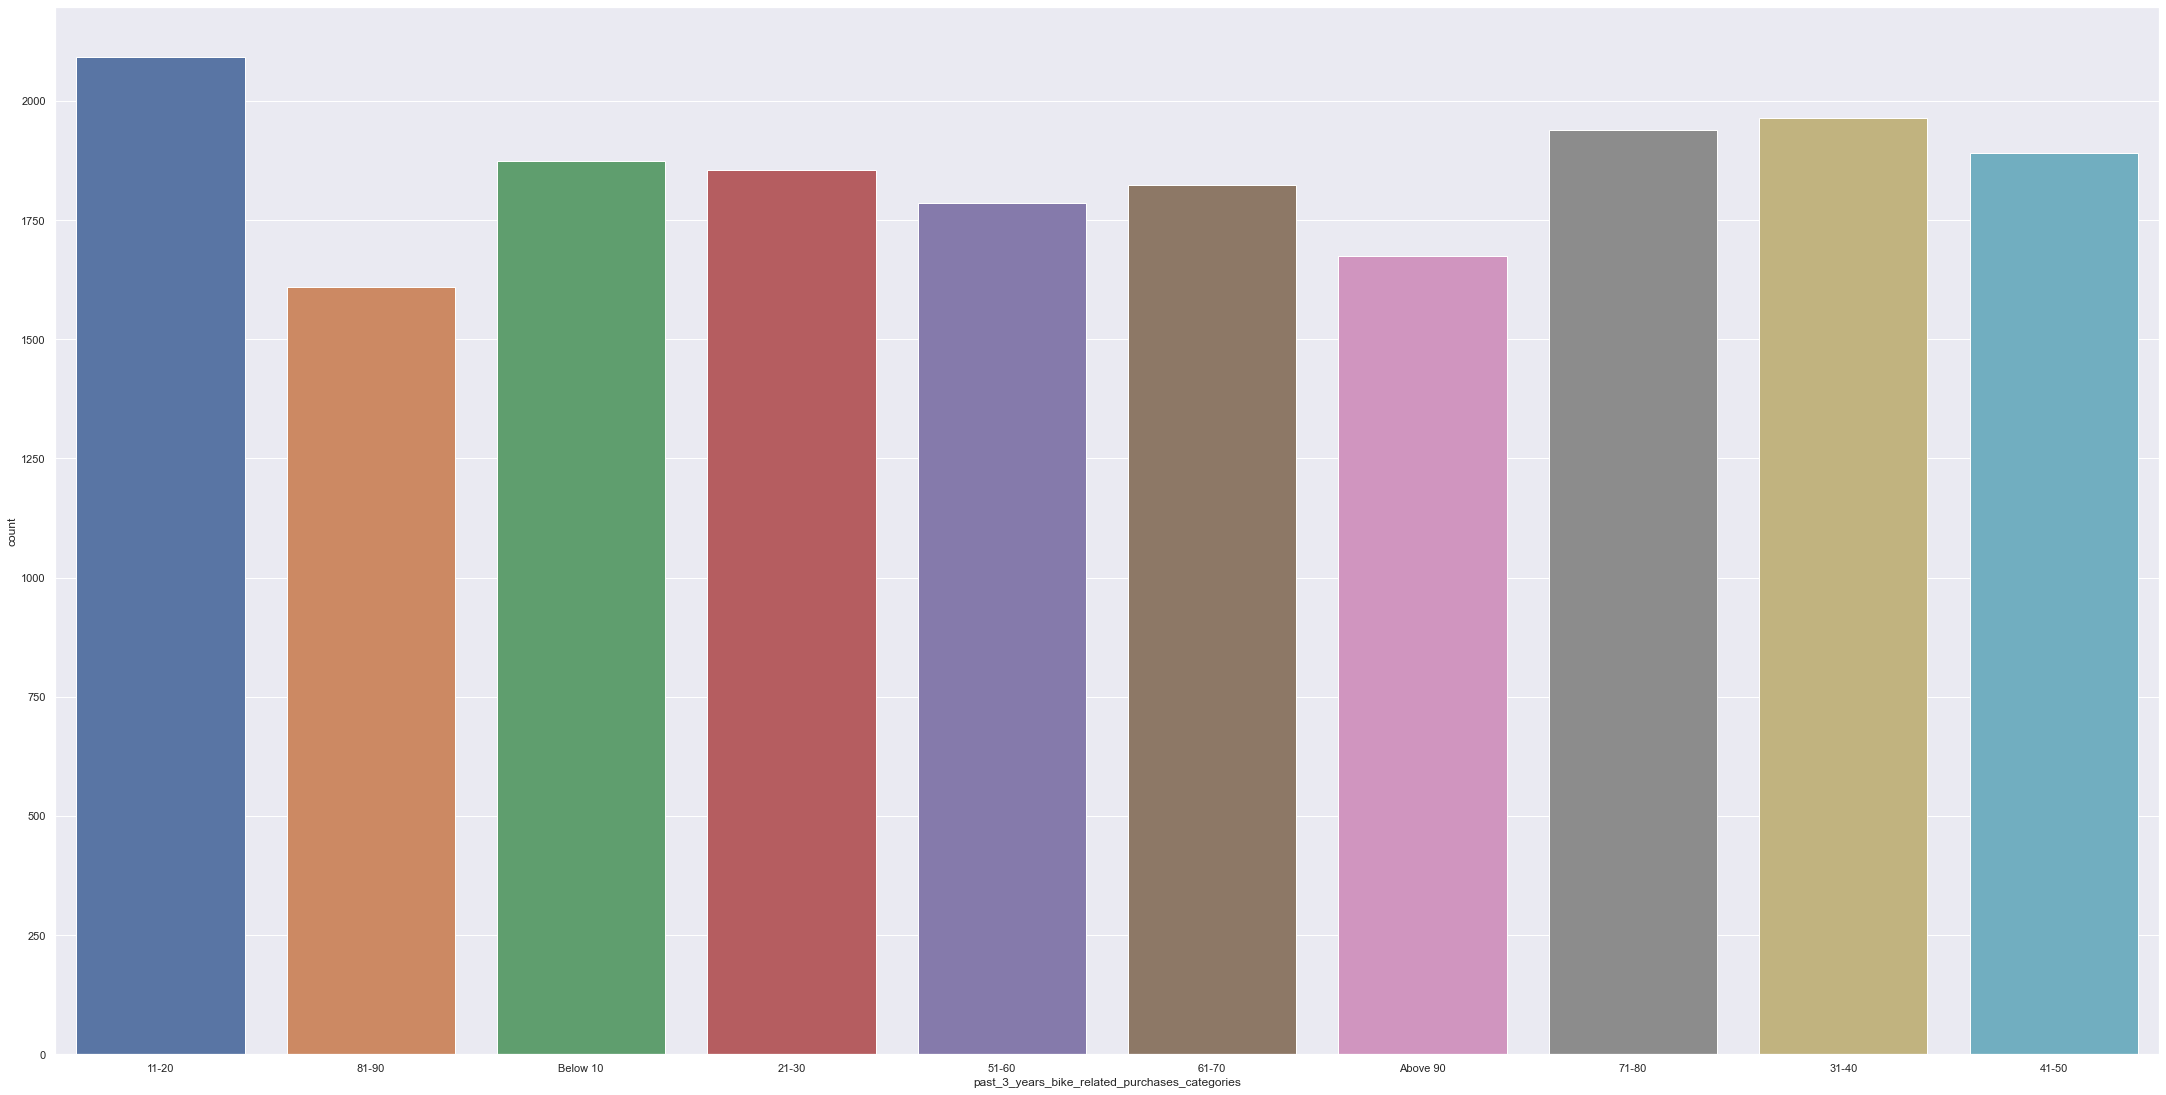

In [58]:
sns.countplot(x = 'past_3_years_bike_related_purchases_categories', data = combined_df)

Text(0.5, 1.0, 'Transactions Price Category Distribution')

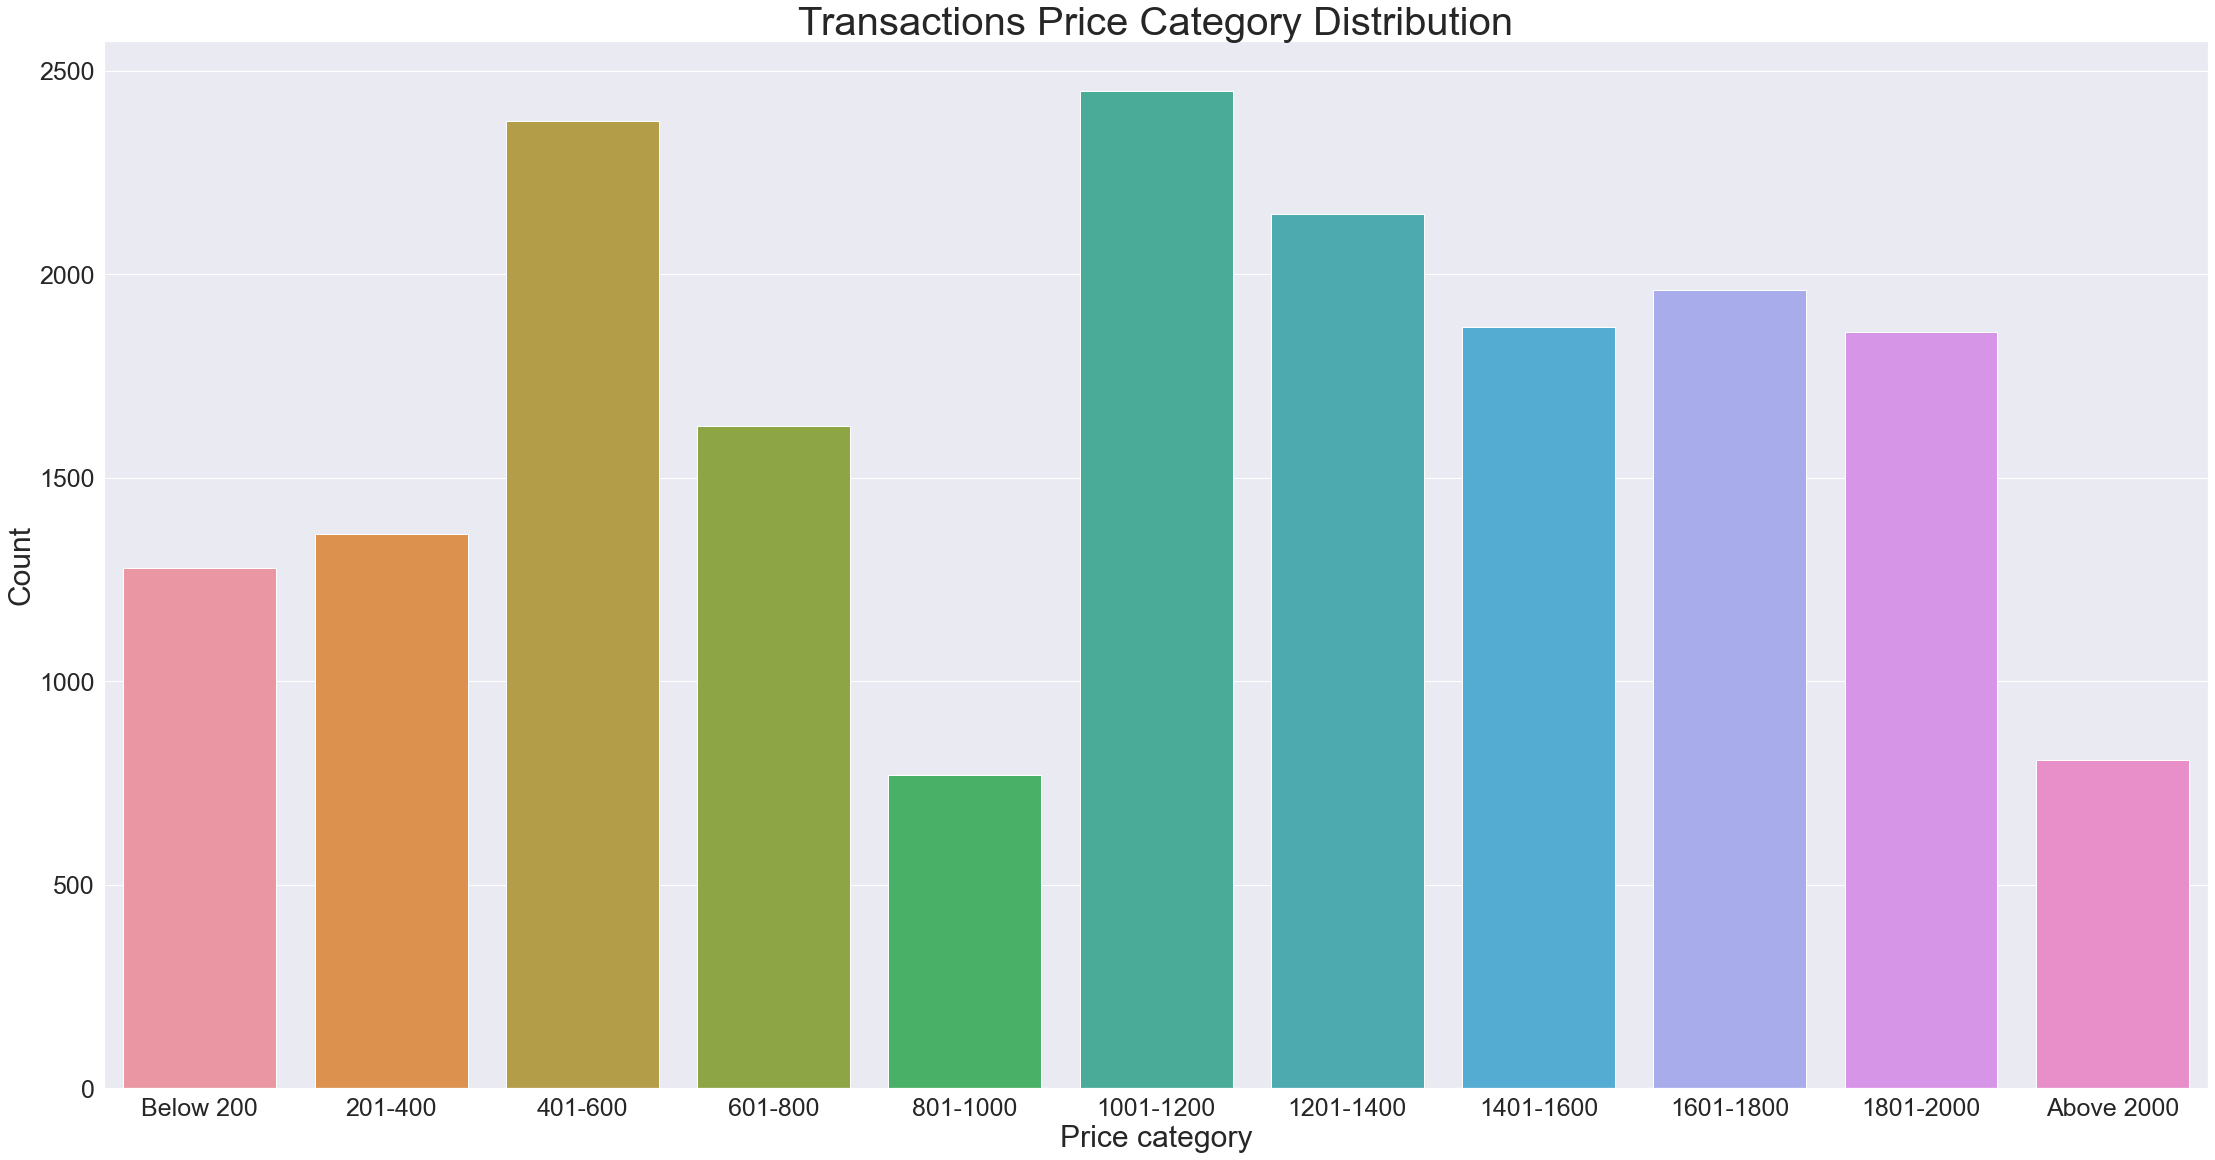

In [111]:
sns.countplot(x = 'list_price_categories', data = combined_df, order = ['Below 200', '201-400', '401-600', '601-800', '801-1000'
                                                                       , '1001-1200', '1201-1400', '1401-1600', '1601-1800'
                                                                       , '1801-2000', 'Above 2000'])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Price category', fontsize=30)
plt.ylabel('Count', fontsize=30)
plt.title("Transactions Price Category Distribution", fontsize = 40)

In [61]:
def age_category(age):
    if age < 18:
        return "Below 18"
    if 18 <= age <= 24:
        return "18-24"
    if 25 <= age <= 34:
        return "25-34"
    if 35 <= age <= 44:
        return "35-44"
    if 45 <= age <= 54:
        return "45-54"
    if 55 <= age <= 64:
        return "55-64"
    if age > 64:
        return "Above 64"

combined_df['Age_category'] = combined_df.Age.apply(age_category)

In [62]:
combined_df['Age_category'].value_counts()

45-54       5381
35-44       4188
25-34       3350
55-64       3297
Above 64    1325
18-24        968
Name: Age_category, dtype: int64

Text(0.5, 1.0, 'Age Distribution by gender')

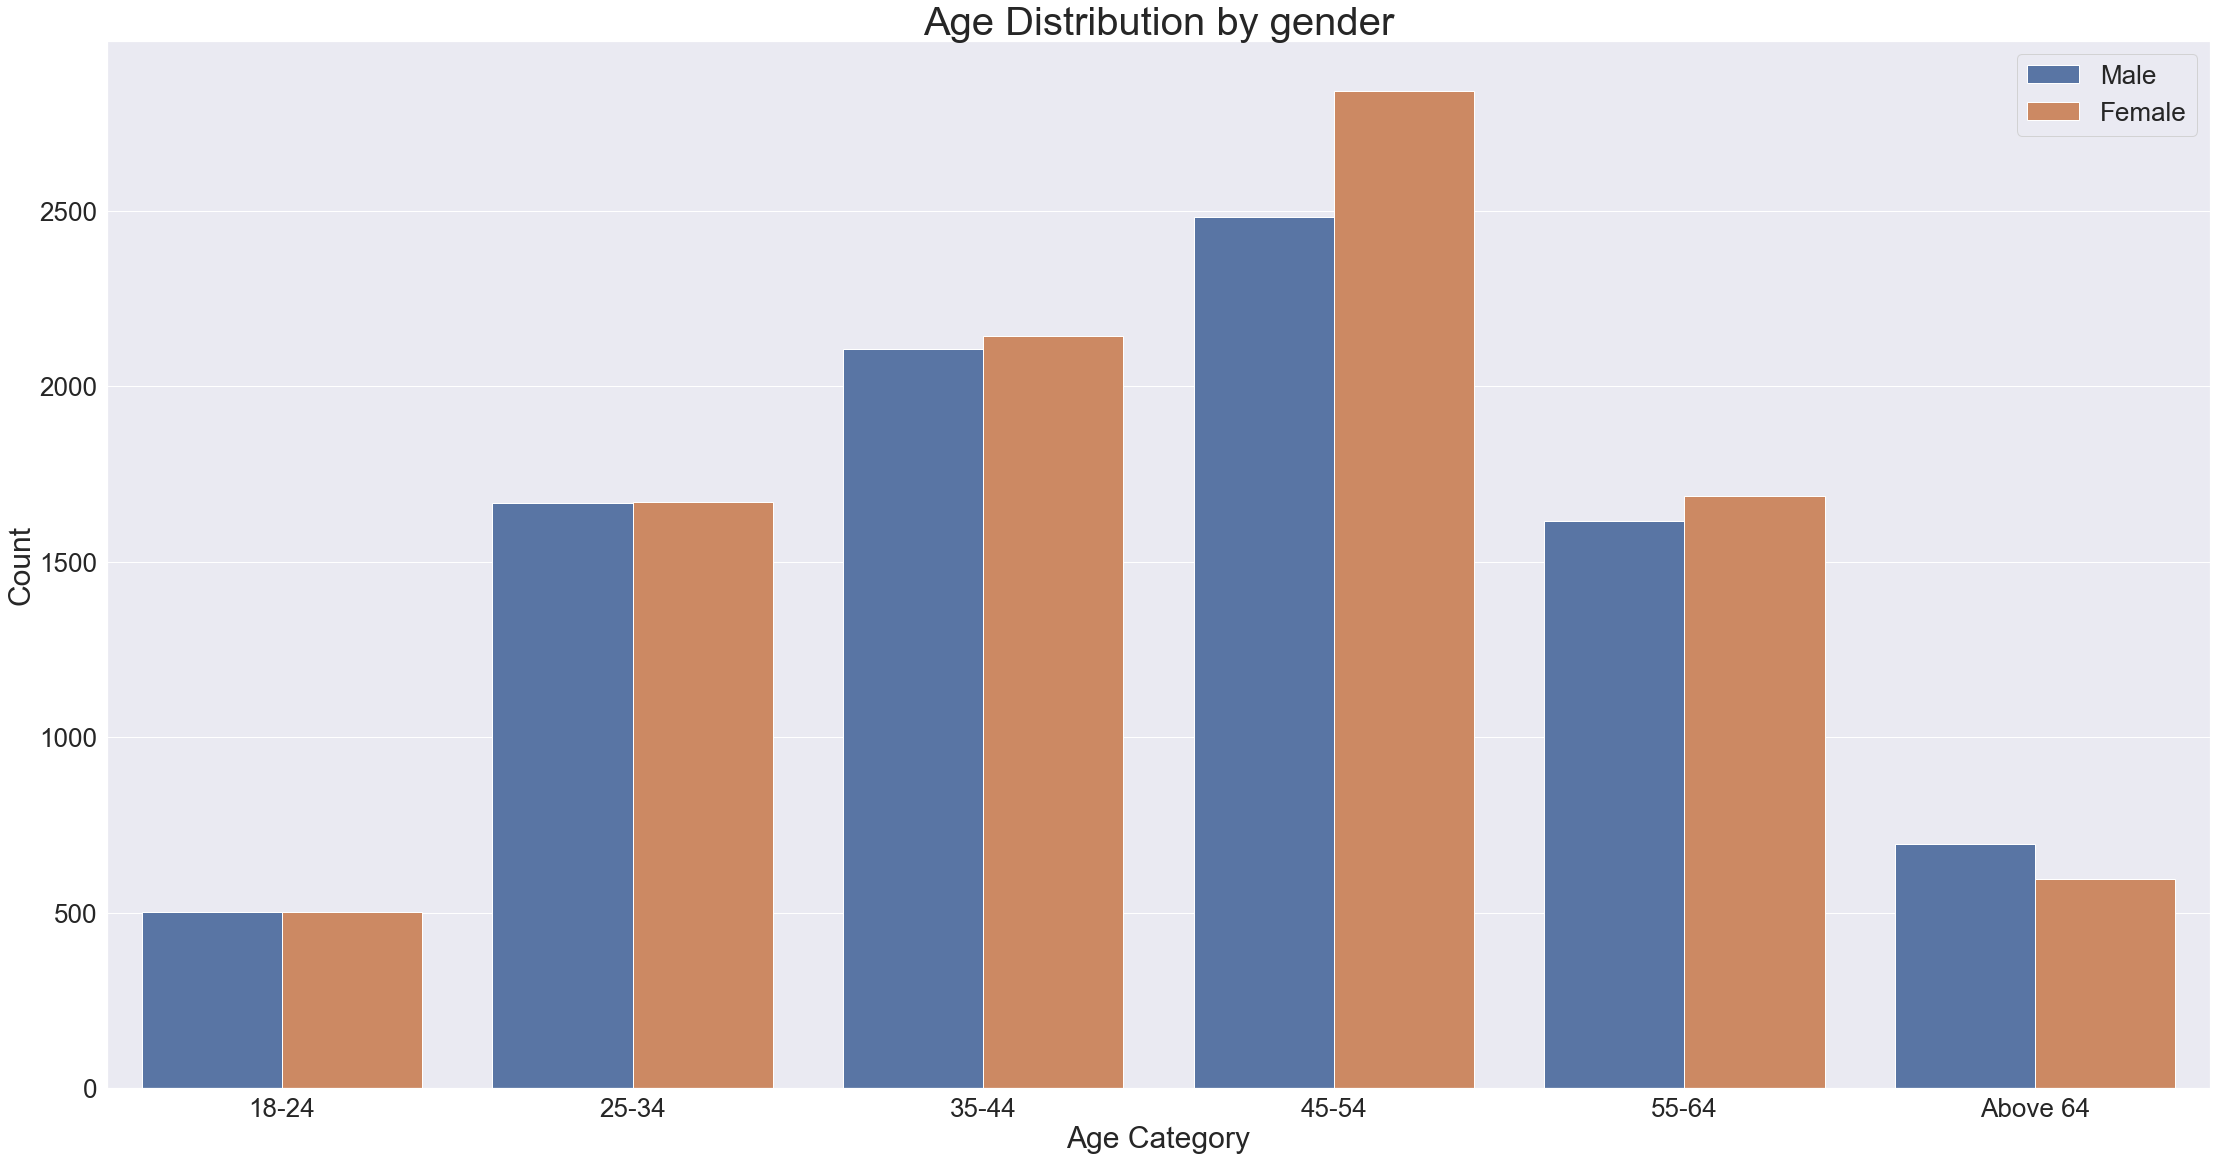

In [259]:

sns.countplot(x = 'Age_category', data = combined_df, order = ['18-24', '25-34', '35-44', '45-54', '55-64', 'Above 64'], hue = 'gender')
plt.legend(fontsize=26)
plt.xticks(fontsize=26);
plt.yticks(fontsize=26);
plt.xlabel(xlabel= 'Age Category',fontsize=30)
plt.ylabel(ylabel= 'Count',fontsize=30)
plt.title("Age Distribution by gender", fontsize = 40)

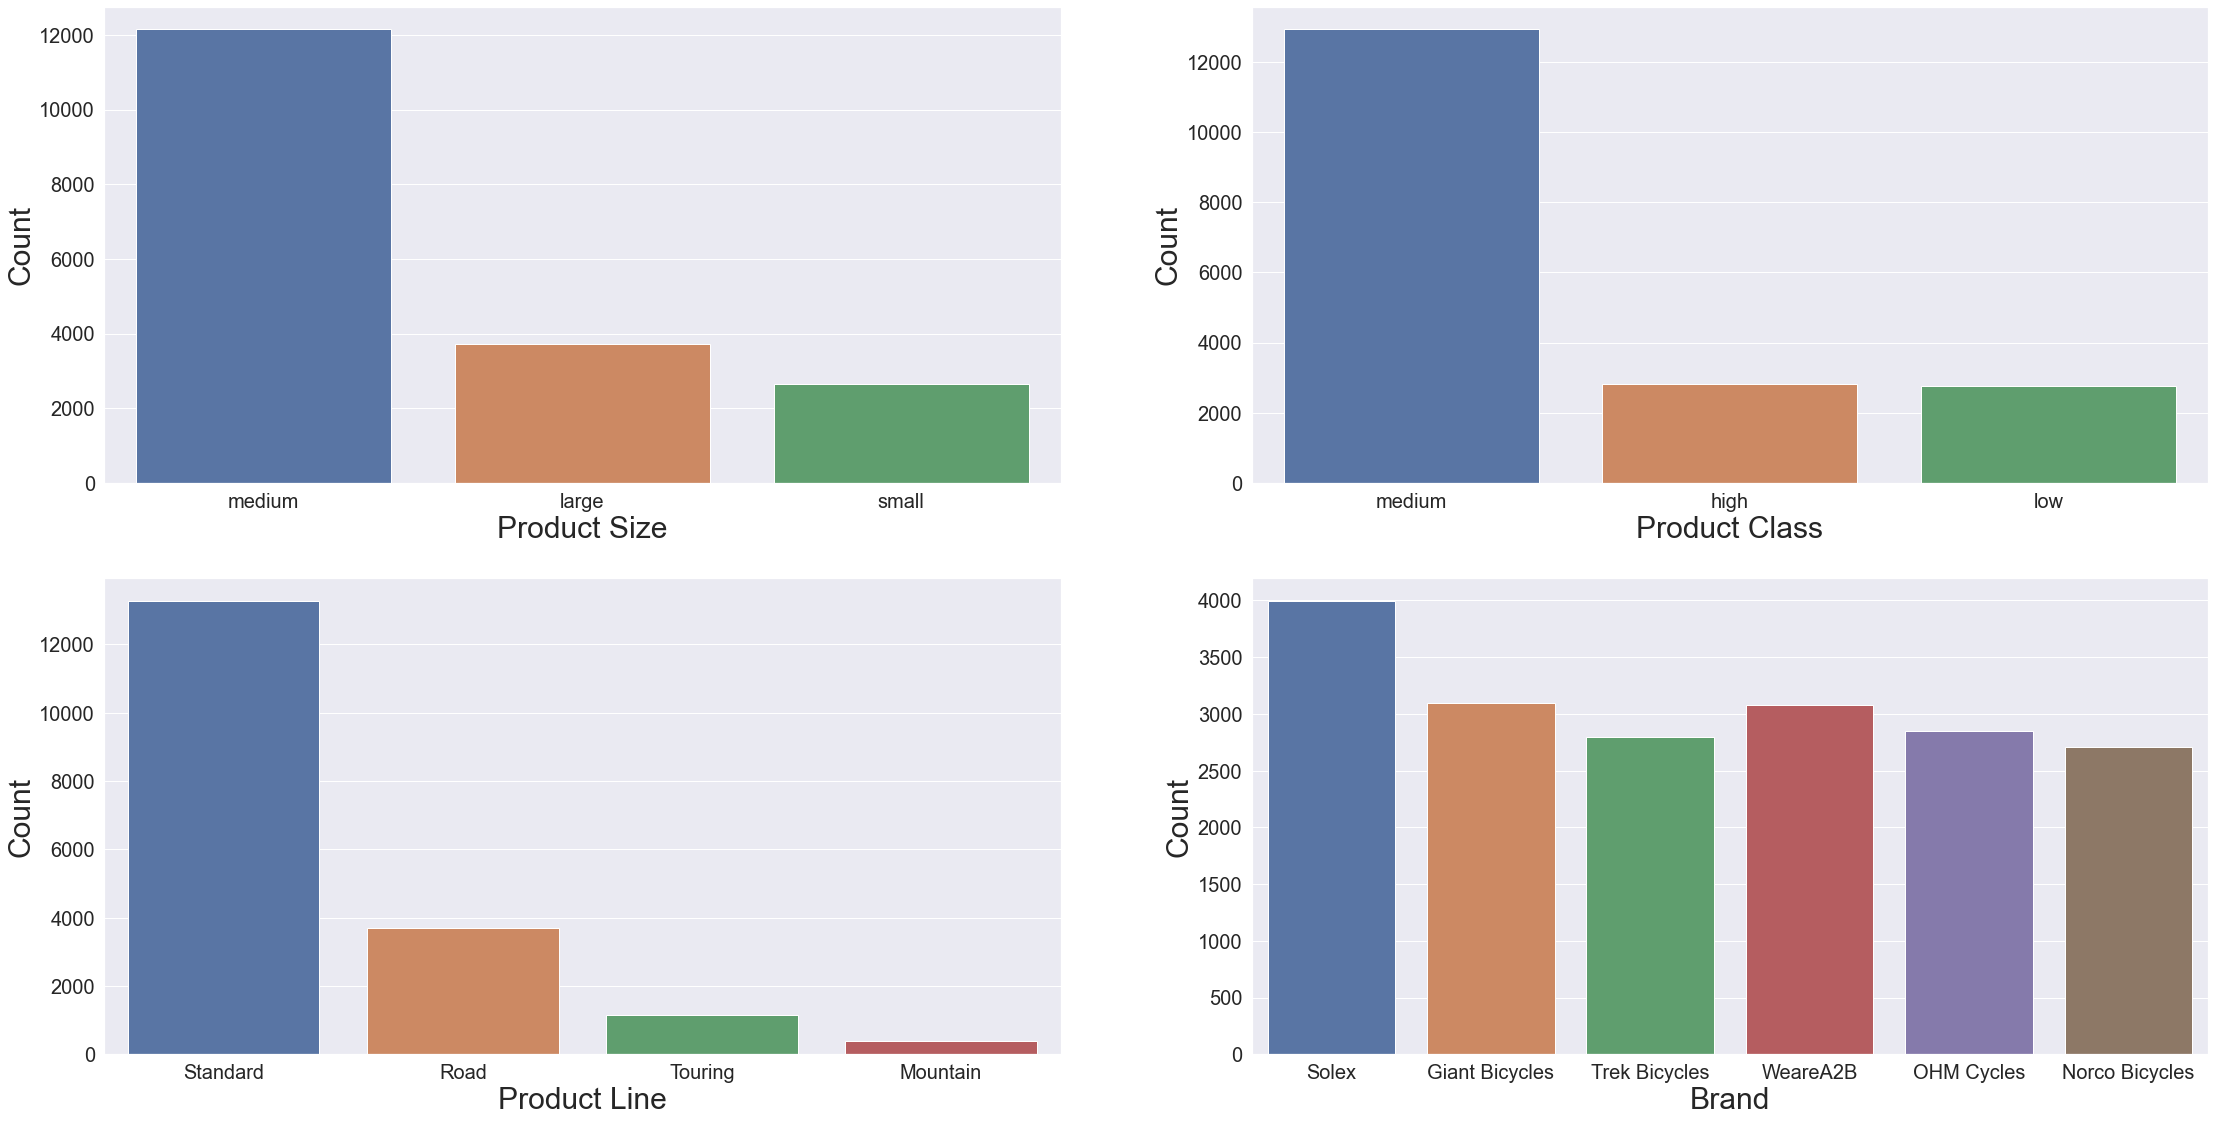

In [813]:
sns.set(rc={'figure.figsize':(37.7,19.27)})
fig, axes = plt.subplots(2,2)
axes[0,0].tick_params(axis='both', labelsize=20)
axes[0,1].tick_params(axis='both', labelsize=20)
axes[1,0].tick_params(axis='both', labelsize=20)
axes[1,1].tick_params(axis='both', labelsize=20)
sns.countplot(x = 'product_size', data = combined_df, ax = axes[0,0]);
sns.countplot(x = 'product_class', data = combined_df, ax = axes[0,1]);
sns.countplot(x = 'product_line', data = combined_df, ax = axes[1,0]);
sns.countplot(x = 'brand', data = combined_df, ax = axes[1,1]);
axes[0,0].set_xlabel("Product Size", fontsize=30);
axes[0,1].set_xlabel("Product Class", fontsize=30);
axes[1,0].set_xlabel("Product Line", fontsize=30);
axes[1,1].set_xlabel("Brand", fontsize=30);
axes[0,0].set_ylabel("Count", fontsize=30);
axes[0,1].set_ylabel("Count", fontsize=30);
axes[1,0].set_ylabel("Count", fontsize=30);
axes[1,1].set_ylabel("Count", fontsize=30);

<AxesSubplot:xlabel='product_class', ylabel='list_price'>

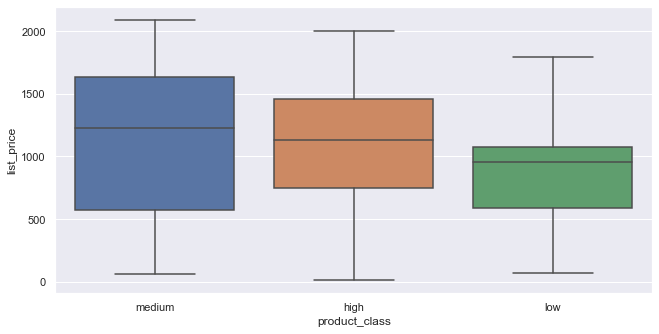

In [833]:
sns.set(rc={'figure.figsize':(10.7,5.27)})
sns.boxplot(y='list_price', data= combined_df, x = 'product_class')

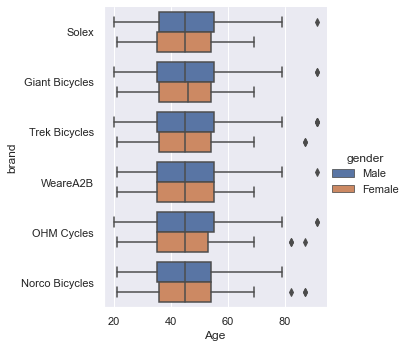

In [178]:
sns.catplot(data=combined_df, x="Age", y="brand", kind="box", hue='gender')

In [227]:
combined_df.groupby(['Age_category', 'transaction_month']).sum().reset_index().head(5)

,Age_category,transaction_month,transaction_id,product_id,customer_id,transaction_month_number,list_price,standard_cost,past_3_years_bike_related_purchases,Age,tenure,postcode,property_valuation
0,18-24,Apr,848579,3386,161242,336,93490.51,48507.65,4437,1922.0,154.0,260933,645
1,18-24,Aug,746783,3377,138590,568,76674.62,37128.40,3555,1635.0,134.0,223736,558
2,18-24,Dec,891704,4233,170348,1056,105505.32,53603.05,4319,2021.0,166.0,262957,673
3,18-24,Feb,772464,3842,139850,156,89889.40,42429.86,3359,1773.0,149.0,219158,600
4,18-24,Jan,916339,4068,172185,87,96009.48,42708.18,4544,1995.0,152.0,272675,628


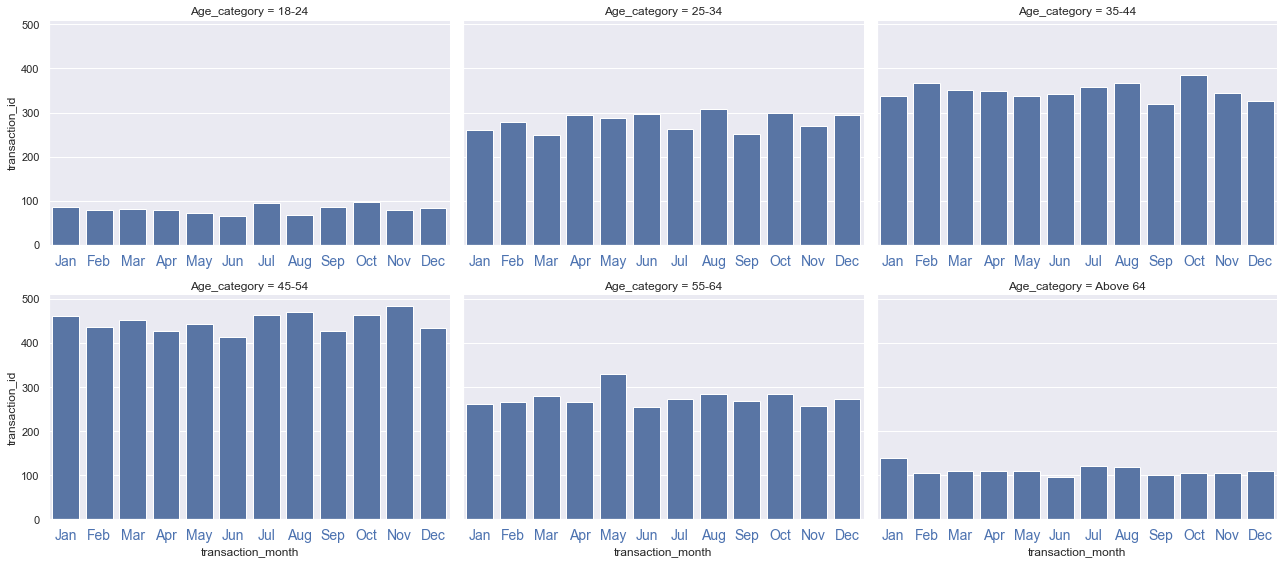

In [63]:
g = sns.FacetGrid(combined_df.groupby(['Age_category', 'transaction_month']).count().reset_index(),
                 col = 'Age_category', col_wrap=3, height=4, sharex=False, aspect = 1.5)
g.map(sns.barplot, "transaction_month", 'transaction_id', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'
                                                                  ,'Oct', 'Nov', 'Dec'])
g.map(plt.xticks, fontsize=14)

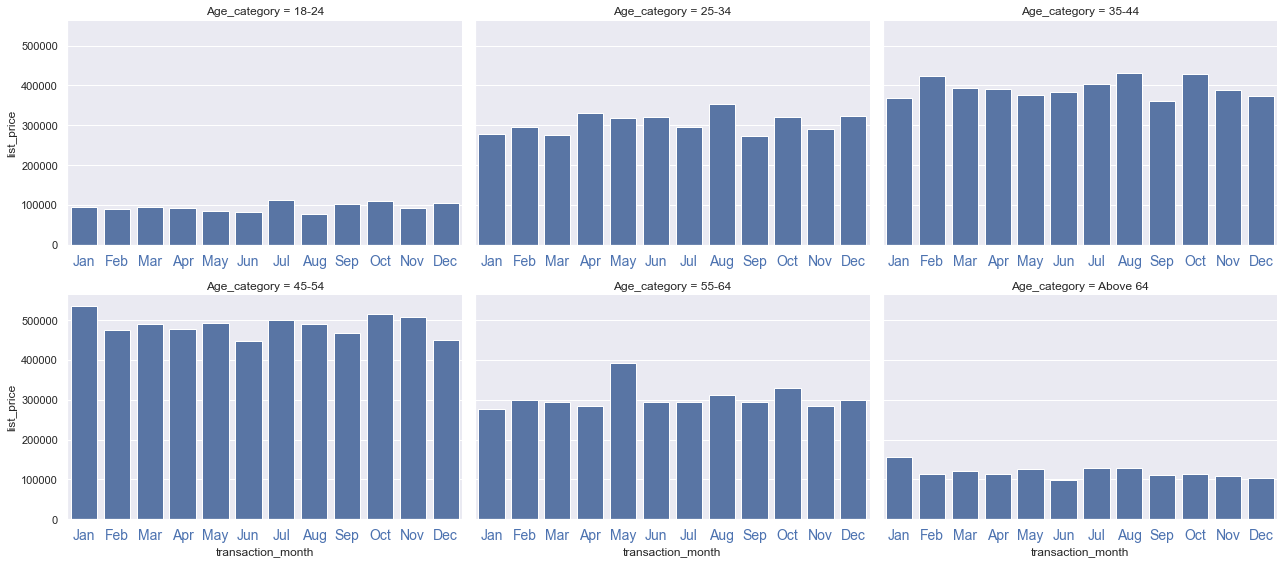

In [226]:
g = sns.FacetGrid(combined_df.groupby(['Age_category', 'transaction_month']).sum().reset_index(),
                 col = 'Age_category', col_wrap=3, height=4, sharex=False, aspect = 1.5)
g.map(sns.barplot, "transaction_month", 'list_price', order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'
                                                                  ,'Oct', 'Nov', 'Dec'])
g.map(plt.xticks, fontsize=14)

In [112]:
top_50_users_list_price = list(combined_df[['customer_id', 'list_price']].groupby('customer_id').sum().sort_values(by='list_price', ascending=False).head(50).reset_index()['customer_id'])

In [113]:
top_50_users_transactions = list(combined_df[['customer_id', 'list_price']].groupby('customer_id').count().sort_values(by='list_price', ascending=False).head(50).reset_index()['customer_id'])

In [114]:
combined_df_vector.brand_no.unique()

NameError: name 'combined_df_vector' is not defined

In [842]:
combined_df.postcode.max()

4883

In [140]:
dict_prop = {}
t = 'tenure'
a = combined_df[t].value_counts().sort_values()
for index, i in enumerate(a.index):
    dict_prop.update({i:a[i]/18509})
dict_prop

combined_df[f'{t}_no'] = combined_df[t].apply(lambda x: dict_prop[x])

**Finding users with more than 3 transactions**

In [137]:
users_with_less_than_4_transactions = list(combined_df.groupby('customer_id').count().reset_index()[combined_df.groupby('customer_id').count().reset_index()['transaction_id'] < 4]['customer_id'])

In [138]:
users_with_less_than_4_transactions.__len__()

640

In [141]:
combined_df_vector = combined_df[['customer_id', 'transaction_month_no', 'product_id_no', 'online_order_no', 'order_status_no',
                                 'brand_no', 'product_line_no', 'product_class_no', 'product_size_no', 'list_price_categories_no'
                                 , 'gender_no', 'past_3_years_bike_related_purchases_categories_no', 'Age_category_no',
                                 'job_title_no', 'job_industry_category_no', 'wealth_segment_no', 'deceased_indicator_no',
                                 'owns_car_no', 'tenure_no', 'postcode_no', 'state_no', 'property_valuation_no']]

In [142]:
combined_df_vector.drop(['order_status_no', 'deceased_indicator_no', 'owns_car_no'], inplace=True, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [144]:
combined_df_vector.agg(['nunique'])

,customer_id,transaction_month_no,product_id_no,online_order_no,brand_no,product_line_no,product_class_no,product_size_no,list_price_categories_no,gender_no,past_3_years_bike_related_purchases_categories_no,Age_category_no,job_title_no,job_industry_category_no,wealth_segment_no,tenure_no,postcode_no,state_no,property_valuation_no
nunique,3323,12,65,2,6,4,3,3,11,2,10,6,112,9,3,22,96,3,12


In [145]:
combined_df_vector_summed = combined_df_vector.groupby('customer_id').sum().reset_index()

In [478]:
for col in combined_df_vector_summed.columns:
    if col != 'customer_id':
        print(combined_df_vector_summed[col])
        break

0       0.909990
1       0.251931
2       0.161867
3       0.505052
4       0.418283
          ...   
3318    0.329948
3319    0.240099
3320    0.499541
3321    0.572694
3322    0.501702
Name: transaction_month_no, Length: 3323, dtype: float64


In [146]:
combined_df_vector_summed.agg(['max', 'min'])

,customer_id,transaction_month_no,product_id_no,online_order_no,brand_no,product_line_no,product_class_no,product_size_no,list_price_categories_no,gender_no,past_3_years_bike_related_purchases_categories_no,Age_category_no,job_title_no,job_industry_category_no,wealth_segment_no,tenure_no,postcode_no,state_no,property_valuation_no
max,3500,1.175644,0.375007,6.994867,2.408666,8.606624,8.132908,7.618564,1.524664,7.141067,1.583122,4.070128,0.381544,3.881031,7.017019,0.844130,0.098331,7.473121,2.309255
min,1,0.078502,0.006159,0.497434,0.146091,0.021503,0.149441,0.143228,0.041547,0.489924,0.086931,0.052299,0.000864,0.020314,0.245286,0.013399,0.000054,0.212329,0.034794


**Removing users with less than 4 transactions**

In [147]:
combined_df_vector_summed = combined_df_vector_summed[~combined_df_vector_summed['customer_id'].isin(users_with_less_than_4_transactions)]

In [271]:
combined_df_vector_summed.shape

(2683, 20)

In [149]:
combined_df.groupby('customer_id').count().reset_index()[combined_df.groupby('customer_id').count().reset_index()['transaction_id'] == 4]

,customer_id,transaction_id,product_id,transaction_date,transaction_month,transaction_month_number,online_order,order_status,brand,product_line,...,Age_category_no,job_title_no,job_industry_category_no,wealth_segment_no,deceased_indicator_no,owns_car_no,postcode_no,state_no,property_valuation_no,tenure_no
17,20,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
26,31,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
29,35,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
32,38,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
36,42,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,3475,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3308,3486,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3313,3491,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3316,3494,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [793]:
combined_df_vector_summed[combined_df_vector_summed.customer_id == 3475]

,customer_id,transaction_month_no,product_id_no,online_order_no,brand_no,product_line_no,product_class_no,product_size_no,list_price_categories_no,gender_no,past_3_years_bike_related_purchases_categories_no,Age_category_no,job_title_no,job_industry_category_no,wealth_segment_no,tenure_no,postcode_no,state_no,property_valuation_no,cluster
3298,3475,0.32649,0.040737,1.994867,0.637095,2.868875,2.792155,1.656113,0.327732,2.040305,0.45232,0.918472,0.031336,0.414069,0.981144,0.170079,0.034146,2.135177,0.573991,5


In [719]:
combined_df_vector_summed = combined_df_vector_summed.reset_index()

In [746]:
# combined_df_vector_summed_array = combined_df_vector_summed.to_numpy()
combined_df_vector_summed.drop(['transaction_month_no', 'product_id_no', 'online_order_no', 'brand_no', 'product_class_no',
                               'product_size_no', 'list_price_categories_no', 'product_line_no'], axis=1)

,index,customer_id,gender_no,past_3_years_bike_related_purchases_categories_no,Age_category_no,job_title_no,job_industry_category_no,wealth_segment_no,tenure_no,postcode_no,state_no,property_valuation_no,cluster
0,0,1,5.610838,0.994867,0.767843,0.156302,1.887514,5.513372,0.612729,0.017235,5.871738,1.578475,0
1,3,5,3.060457,0.578637,1.725539,0.036955,1.663299,1.471716,0.310227,0.005511,3.202766,0.324815,0
2,4,6,2.449619,0.530553,0.892269,0.112378,0.517586,1.267491,0.250689,0.009185,1.269382,0.820682,0
3,6,8,4.409314,0.954995,1.606084,0.016532,0.931655,4.510941,0.542655,0.023826,4.804149,0.487222,0
4,7,9,3.060457,0.542655,1.725539,0.095953,0.181209,1.471716,0.310227,0.007456,3.202766,0.289157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,3317,3495,3.570533,0.675077,1.607326,0.014750,1.731374,1.774488,0.361932,0.020422,3.736561,1.148955,1
2679,3318,3496,1.959695,0.361770,0.918472,0.018153,1.108866,2.004862,0.173969,0.007996,2.135177,0.656545,1
2680,3320,3498,3.060457,0.601653,1.082068,0.208115,1.663299,3.007294,0.333892,0.010697,1.523259,0.324815,1
2681,3321,3499,3.429467,0.701929,1.607326,0.242801,1.940515,3.508509,0.422065,0.004160,1.486304,1.148955,1


In [150]:
combined_df_vector_summed.head()

,customer_id,transaction_month_no,product_id_no,online_order_no,brand_no,product_line_no,product_class_no,product_size_no,list_price_categories_no,gender_no,past_3_years_bike_related_purchases_categories_no,Age_category_no,job_title_no,job_industry_category_no,wealth_segment_no,tenure_no,postcode_no,state_no,property_valuation_no
0,1,0.909990,0.107947,5.502566,1.850883,5.640445,6.035712,6.191474,0.977470,5.610838,0.994867,0.787455,0.156302,1.887514,5.513372,0.612729,0.017235,5.871738,1.578475
3,5,0.505052,0.054784,2.994867,0.992328,2.054352,2.545518,2.000000,0.614566,3.060457,0.578637,1.744341,0.036955,1.663299,1.471716,0.310227,0.005511,3.202766,0.324815
4,6,0.418283,0.149981,2.497434,0.817548,3.586093,2.944676,2.825112,0.459506,2.449619,0.530553,0.890648,0.112378,0.517586,1.267491,0.250689,0.009185,1.269382,0.820682
6,8,0.758118,0.108164,4.502566,1.492733,5.281809,3.548598,4.538657,0.871252,4.409314,0.954995,1.603166,0.016532,0.931655,4.510941,0.542655,0.023826,4.804149,0.487222
7,9,0.504349,0.064563,2.989735,1.134745,3.785564,3.094116,3.481225,0.524285,3.060457,0.542655,1.744341,0.095953,0.181209,1.471716,0.310227,0.007456,3.202766,0.289157


In [151]:
import numpy as np
#set the k values you would like to try
k_dist = range(2,10)
print(k_dist)

#initial the corresponding distances for each k value
k_disValues = np.zeros(len(k_dist))
print(k_disValues)

range(2, 10)
[0. 0. 0. 0. 0. 0. 0. 0.]


In [152]:
combined_df.list_price_categories

0         Below 200
1         1401-1600
2           401-600
3        Above 2000
4         1001-1200
            ...    
18504       201-400
18505       401-600
18506    Above 2000
18507    Above 2000
18508    Above 2000
Name: list_price_categories, Length: 18509, dtype: object

In [153]:
N_samples = combined_df_vector_summed.shape[0]

In [154]:
from sklearn.cluster import KMeans
import math

for cur_k_ind in range(0,len(k_dist)):
    #try each k value, starting from the first one with index 0
    
    K_dataset_2 = k_dist[cur_k_ind]
    print(K_dataset_2)
    km_2 = KMeans(n_clusters=K_dataset_2)
    labels_2=km_2.fit(combined_df_vector_summed.iloc[:,1:]).labels_
#     plt.scatter(dataset_2[:, 0], dataset_2[:, 1], s=5, c=labels_2, alpha=0.8, lw=0)
#     plt.scatter(km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:, 1], s=100, c=np.unique(labels_2), lw=0.0)

    #calculate the corresponding average distance to the centriods for this k value
    sumDis = 0
    for ind in range(0,N_samples):
        sqr_sum = 0
        for i in range(0, 18):
            x = combined_df_vector_summed.iloc[:,1:].iloc[ind, i]
            y = km_2.cluster_centers_[labels_2[ind], i]
            sqr_sum += (math.pow(y - x, 2))
        dis = math.sqrt(sqr_sum) 
    
        sumDis = sumDis + dis

    k_disValues[cur_k_ind] = sumDis/N_samples

2
3
4
5
6
7
8
9


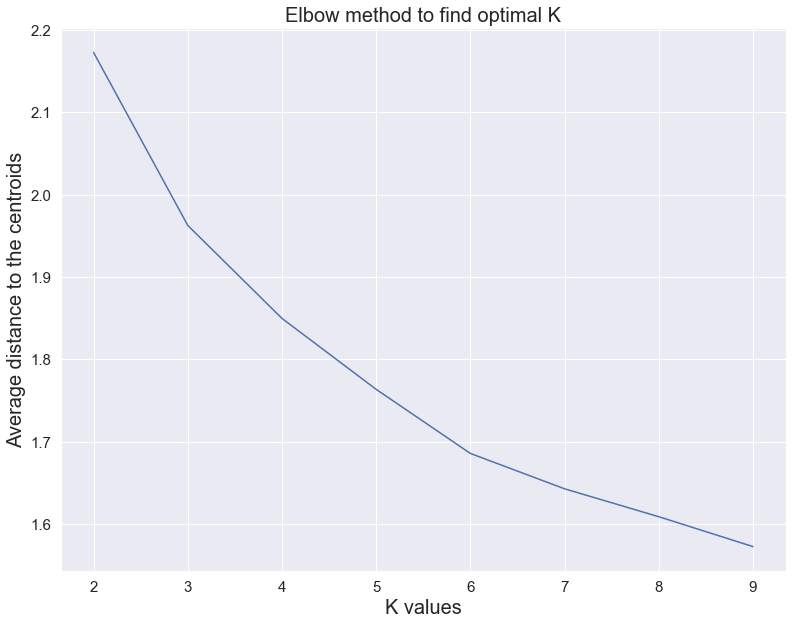

In [155]:
plt.figure(figsize=(13,10))
plt.plot(k_dist, k_disValues);
plt.xlabel('K values', fontsize = 20);
plt.ylabel('Average distance to the centroids', fontsize = 20);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.title("Elbow method to find optimal K", fontsize=20);

<AxesSubplot:xlabel='product_size', ylabel='count'>

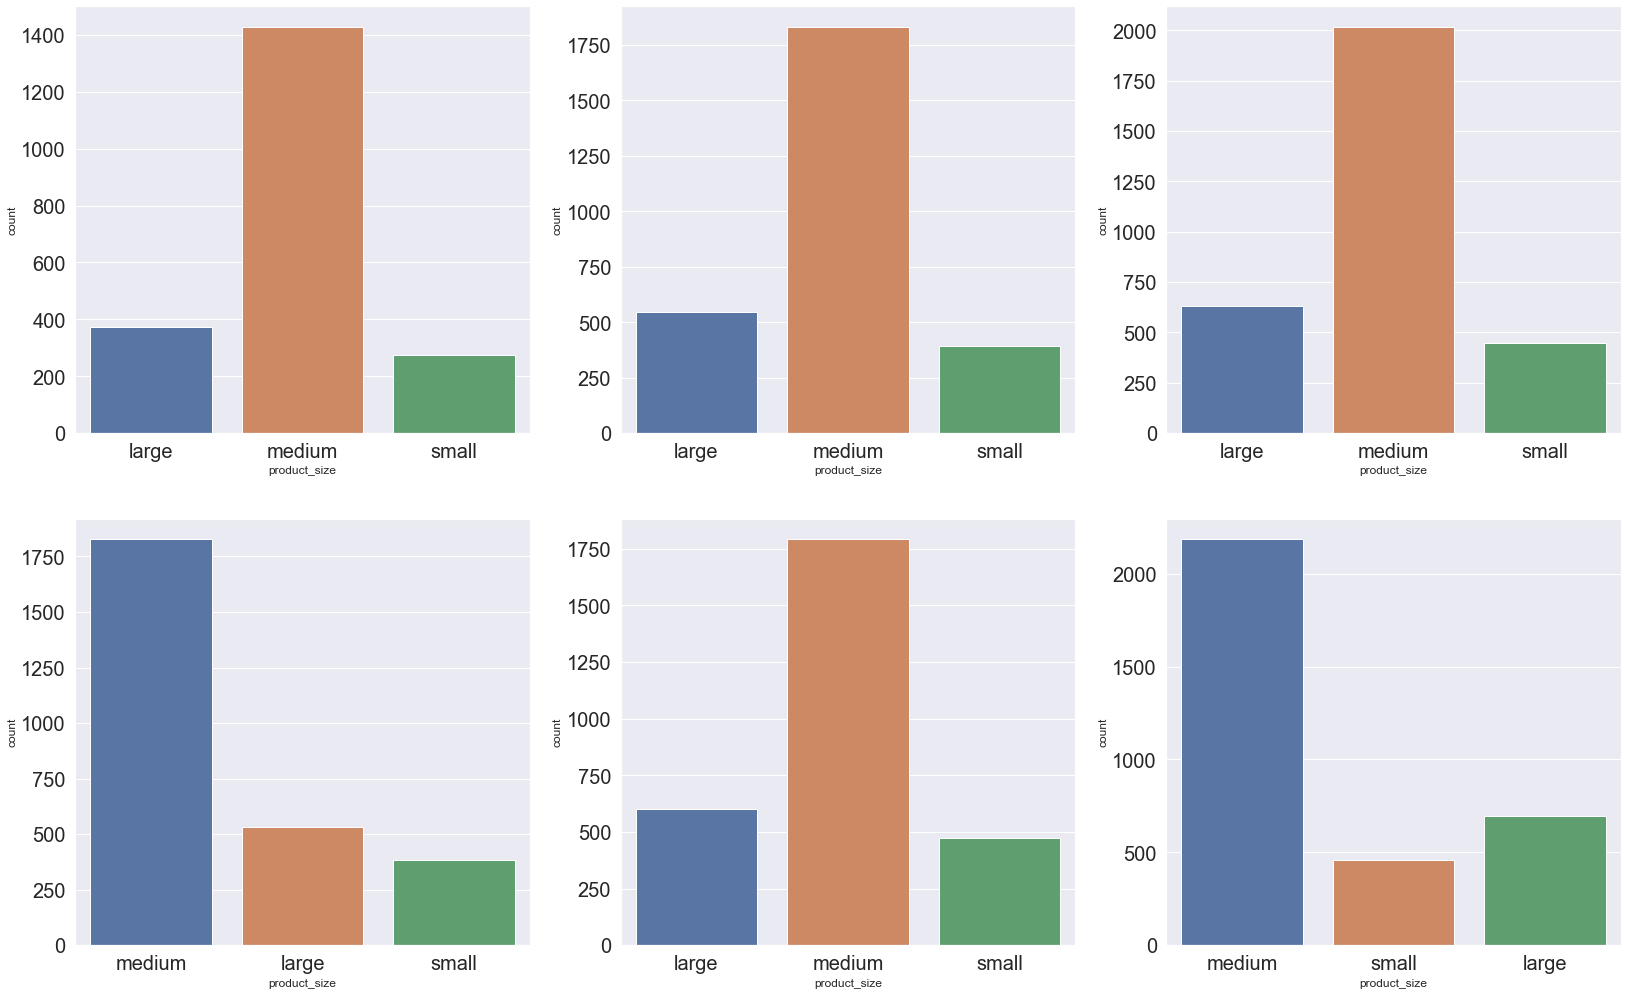

In [892]:
fig, axes = plt.subplots(2,3)
axes[0,0].tick_params(axis='both', labelsize=20)
axes[0,1].tick_params(axis='both', labelsize=20)
axes[0,2].tick_params(axis='both', labelsize=20)
axes[1,0].tick_params(axis='both', labelsize=20)
axes[1,1].tick_params(axis='both', labelsize=20)
axes[1,2].tick_params(axis='both', labelsize=20)
x = 'product_size'
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[0])]
             , ax=axes[0,0])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[1])]
             , ax=axes[0,1])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[2])]
             , ax=axes[0,2])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[3])]
             , ax=axes[1,0])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[4])]
             , ax=axes[1,1])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[5])]
             , ax=axes[1,2])

<AxesSubplot:xlabel='product_class', ylabel='count'>

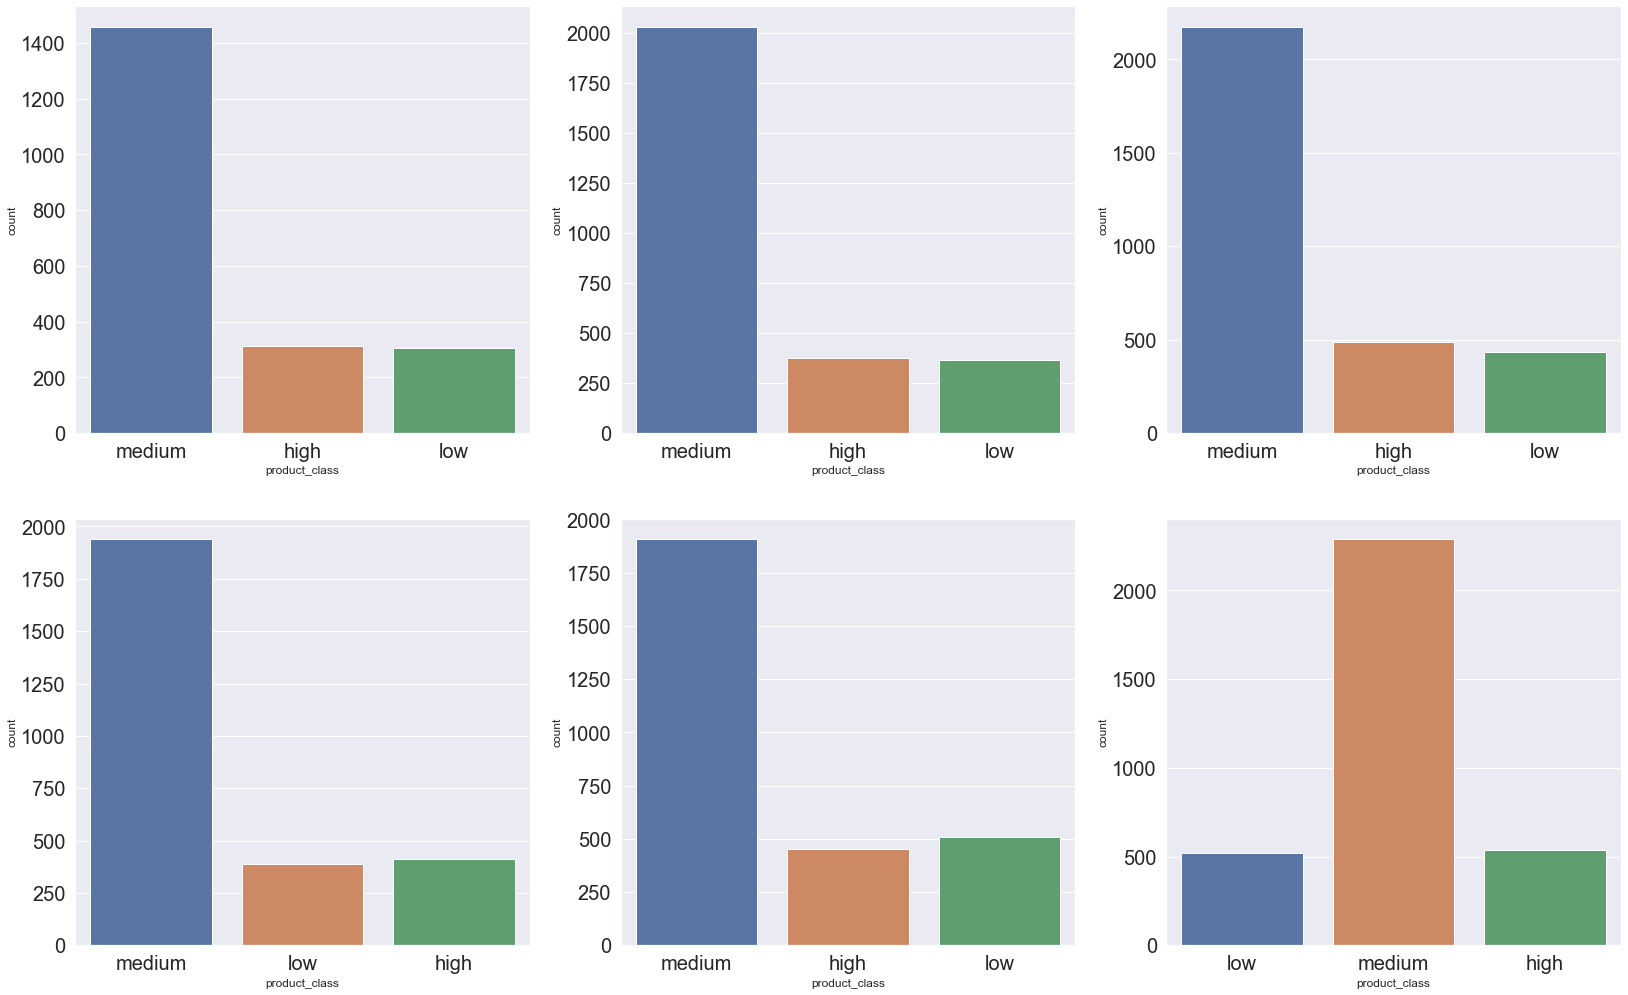

In [893]:
fig, axes = plt.subplots(2,3)
axes[0,0].tick_params(axis='both', labelsize=20)
axes[0,1].tick_params(axis='both', labelsize=20)
axes[0,2].tick_params(axis='both', labelsize=20)
axes[1,0].tick_params(axis='both', labelsize=20)
axes[1,1].tick_params(axis='both', labelsize=20)
axes[1,2].tick_params(axis='both', labelsize=20)
sns.countplot(x = 'product_class', data = combined_df[combined_df.customer_id.isin(req_cust_ids[0])]
             , ax=axes[0,0])
sns.countplot(x = 'product_class', data = combined_df[combined_df.customer_id.isin(req_cust_ids[1])]
             , ax=axes[0,1])
sns.countplot(x = 'product_class', data = combined_df[combined_df.customer_id.isin(req_cust_ids[2])]
             , ax=axes[0,2])
sns.countplot(x = 'product_class', data = combined_df[combined_df.customer_id.isin(req_cust_ids[3])]
             , ax=axes[1,0])
sns.countplot(x = 'product_class', data = combined_df[combined_df.customer_id.isin(req_cust_ids[4])]
             , ax=axes[1,1])
sns.countplot(x = 'product_class', data = combined_df[combined_df.customer_id.isin(req_cust_ids[5])]
             , ax=axes[1,2])

<AxesSubplot:xlabel='product_line', ylabel='count'>

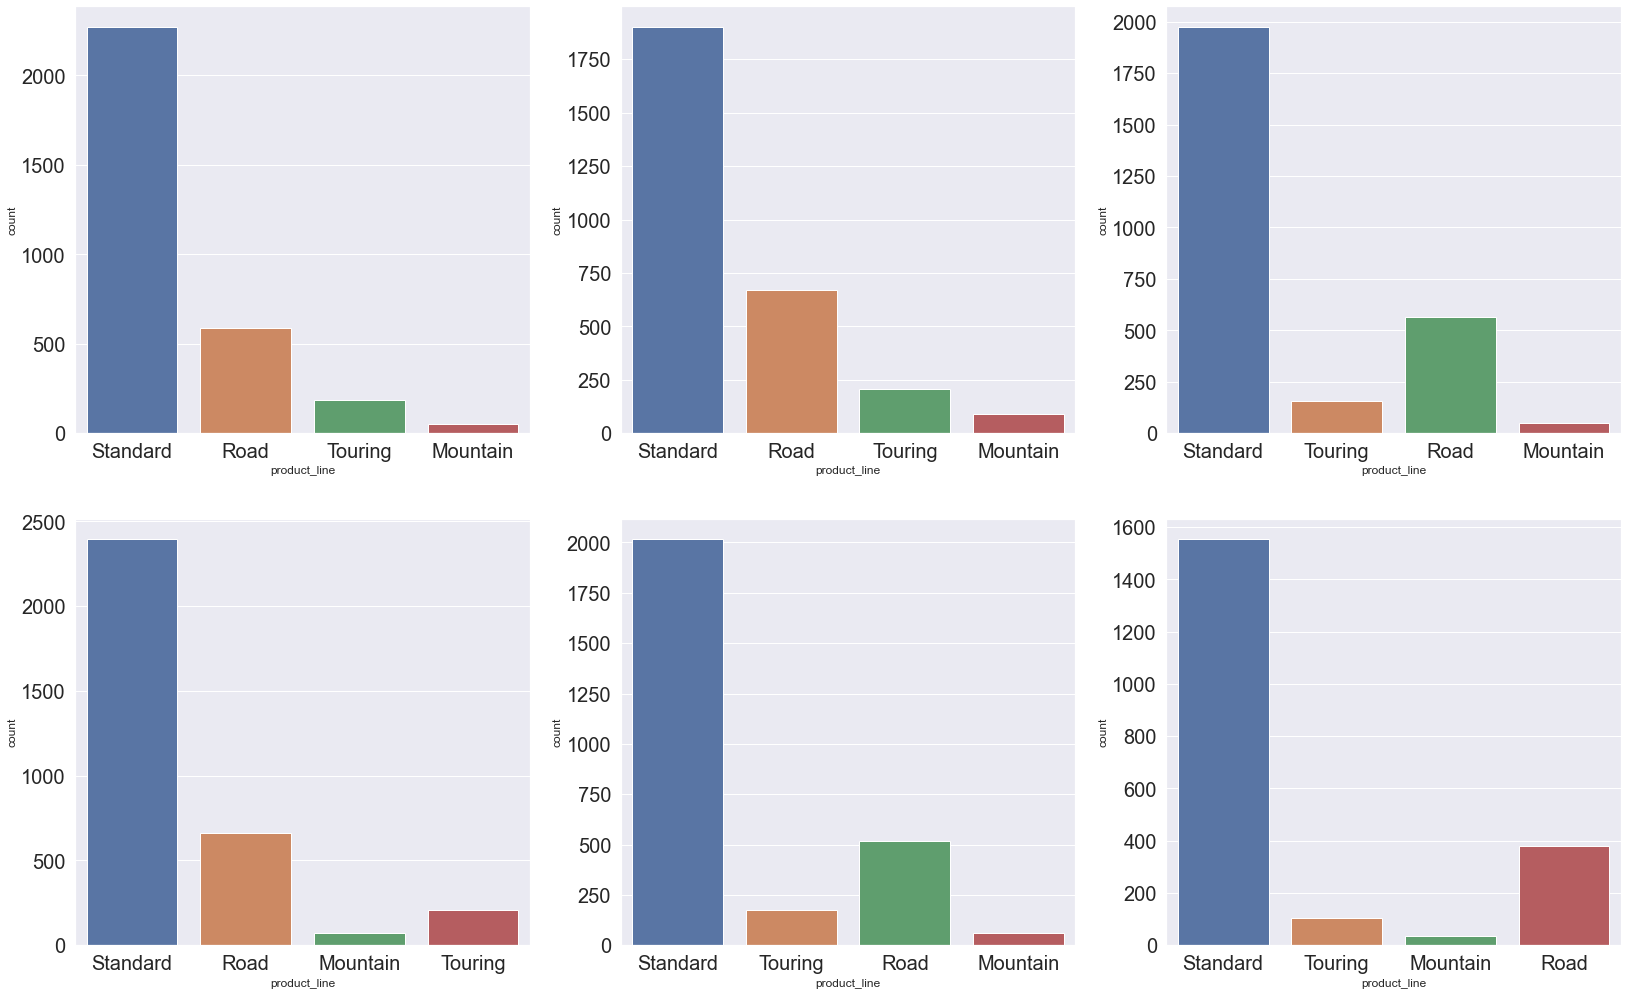

In [900]:
fig, axes = plt.subplots(2,3)
axes[0,0].tick_params(axis='both', labelsize=20)
axes[0,1].tick_params(axis='both', labelsize=20)
axes[0,2].tick_params(axis='both', labelsize=20)
axes[1,0].tick_params(axis='both', labelsize=20)
axes[1,1].tick_params(axis='both', labelsize=20)
axes[1,2].tick_params(axis='both', labelsize=20)
x = 'product_line'
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[0])]
             , ax=axes[0,0])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[1])]
             , ax=axes[0,1])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[2])]
             , ax=axes[0,2])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[3])]
             , ax=axes[1,0])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[4])]
             , ax=axes[1,1])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[5])]
             , ax=axes[1,2])

<AxesSubplot:xlabel='state', ylabel='count'>

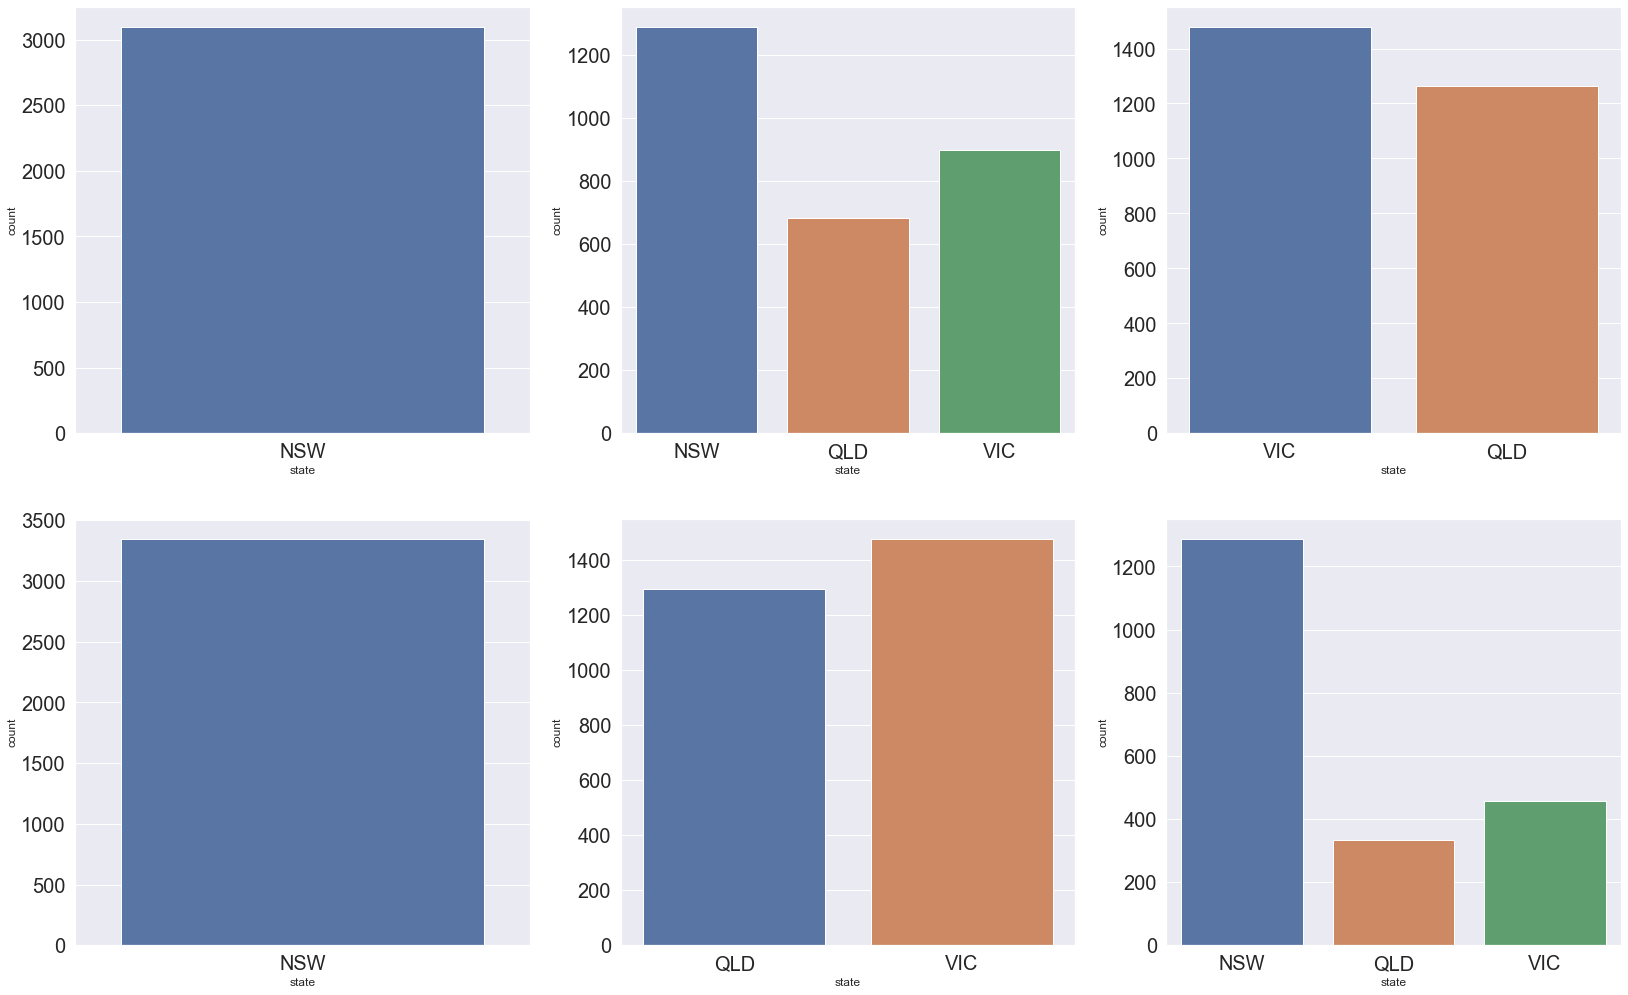

In [903]:
fig, axes = plt.subplots(2,3)
axes[0,0].tick_params(axis='both', labelsize=20)
axes[0,1].tick_params(axis='both', labelsize=20)
axes[0,2].tick_params(axis='both', labelsize=20)
axes[1,0].tick_params(axis='both', labelsize=20)
axes[1,1].tick_params(axis='both', labelsize=20)
axes[1,2].tick_params(axis='both', labelsize=20)
x = 'state'
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[0])]
             , ax=axes[0,0])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[1])]
             , ax=axes[0,1])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[2])]
             , ax=axes[0,2])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[3])]
             , ax=axes[1,0])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[4])]
             , ax=axes[1,1])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[5])]
             , ax=axes[1,2])

In [911]:
combined_df_vector_summed.loc[:, 'cluster'] = combined_df_vector_summed.cluster.replace({0:'Cat_4',1:'Cat_2',2:'Cat_5', 3: 'Cat_1',4:'Cat_3',5:'Cat_6'})

In [912]:
combined_df_vector_summed.cluster.value_counts()

Cat_2    673
Cat_1    593
Cat_3    473
Cat_4    404
Cat_5    342
Cat_6    198
Name: cluster, dtype: int64

In [890]:
# fig, axes = plt.subplots(2,3)

combined_df[combined_df.customer_id.isin(req_cust_ids[1])].list_price

3081372.1399999997

In [686]:
combined_df[combined_df.customer_id.isin(req_cust_ids[0])].groupby('Age_category').count()

,transaction_id,product_id,customer_id,transaction_date,transaction_month,transaction_month_number,online_order,order_status,brand,product_line,...,Age_category_no,job_title_no,job_industry_category_no,wealth_segment_no,deceased_indicator_no,owns_car_no,tenure_no,postcode_no,state_no,property_valuation_no
Age_category,,,,,,,,,,,,,,,,,,,,,
18-24,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
25-34,543,543,543,543,543,543,543,543,543,543,...,543,543,543,543,543,543,543,543,543,543
35-44,647,647,647,647,647,647,647,647,647,647,...,647,647,647,647,647,647,647,647,647,647
45-54,849,849,849,849,849,849,849,849,849,849,...,849,849,849,849,849,849,849,849,849,849
55-64,531,531,531,531,531,531,531,531,531,531,...,531,531,531,531,531,531,531,531,531,531
Above 64,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144


In [156]:
km_2 = KMeans(n_clusters=3)
labels_2=km_2.fit(combined_df_vector_summed.iloc[:,1:]).labels_

In [157]:
combined_df_vector_summed['cluster'] = labels_2
combined_df_vector_summed['cluster'].nunique()

3

In [158]:
req_cust_ids = []
for i in range(0,3):
    req_cust_ids.append(combined_df_vector_summed[combined_df_vector_summed.cluster == i]['customer_id'].tolist())

In [159]:
len(req_cust_ids[2])

1056

<AxesSubplot:xlabel='transaction_id', ylabel='count'>

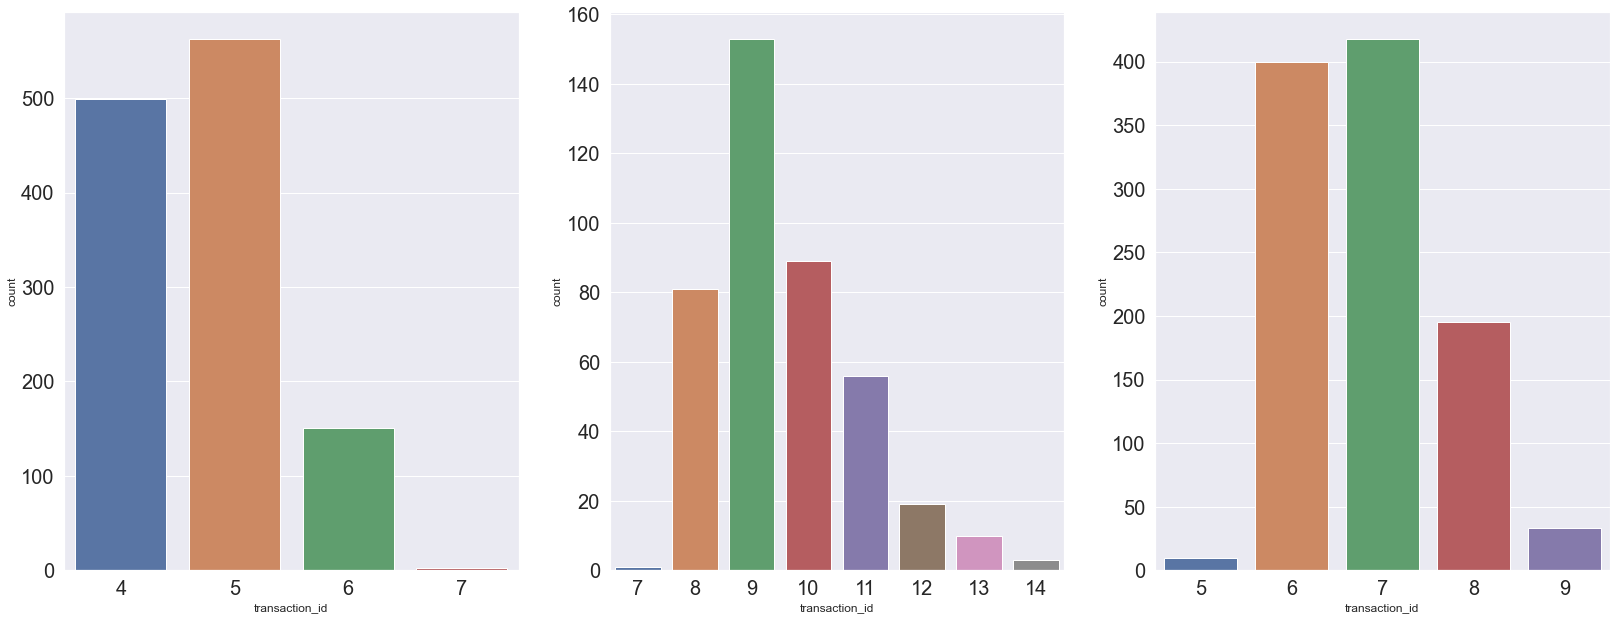

In [160]:
sns.set(rc={'figure.figsize':(27.7,10.27)})
fig, axes = plt.subplots(1,3)
axes[0].tick_params(axis='both', labelsize=20)
axes[1].tick_params(axis='both', labelsize=20)
axes[2].tick_params(axis='both', labelsize=20)
sns.countplot(x = 'transaction_id', data = combined_df[combined_df.customer_id.isin(req_cust_ids[0])].groupby('customer_id').count()
             , ax=axes[0])
sns.countplot(x = 'transaction_id', data = combined_df[combined_df.customer_id.isin(req_cust_ids[1])].groupby('customer_id').count()
             , ax=axes[1])
sns.countplot(x = 'transaction_id', data = combined_df[combined_df.customer_id.isin(req_cust_ids[2])].groupby('customer_id').count()
             , ax=axes[2])

<AxesSubplot:xlabel='Age_category', ylabel='count'>

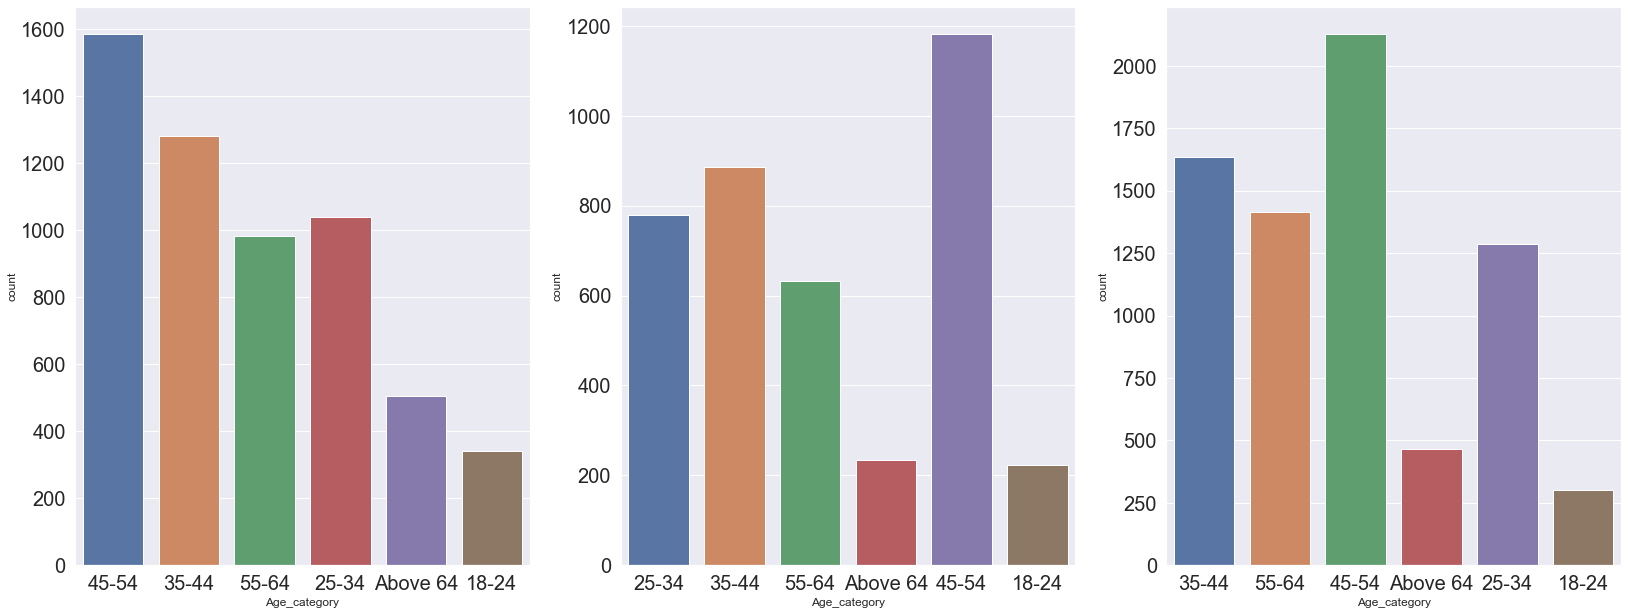

In [161]:
fig, axes = plt.subplots(1,3)
axes[0].tick_params(axis='both', labelsize=20)
axes[1].tick_params(axis='both', labelsize=20)
axes[2].tick_params(axis='both', labelsize=20)
x = 'Age_category'
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[0])]
             , ax=axes[0])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[1])]
             , ax=axes[1])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[2])]
             , ax=axes[2])

<AxesSubplot:xlabel='product_line', ylabel='count'>

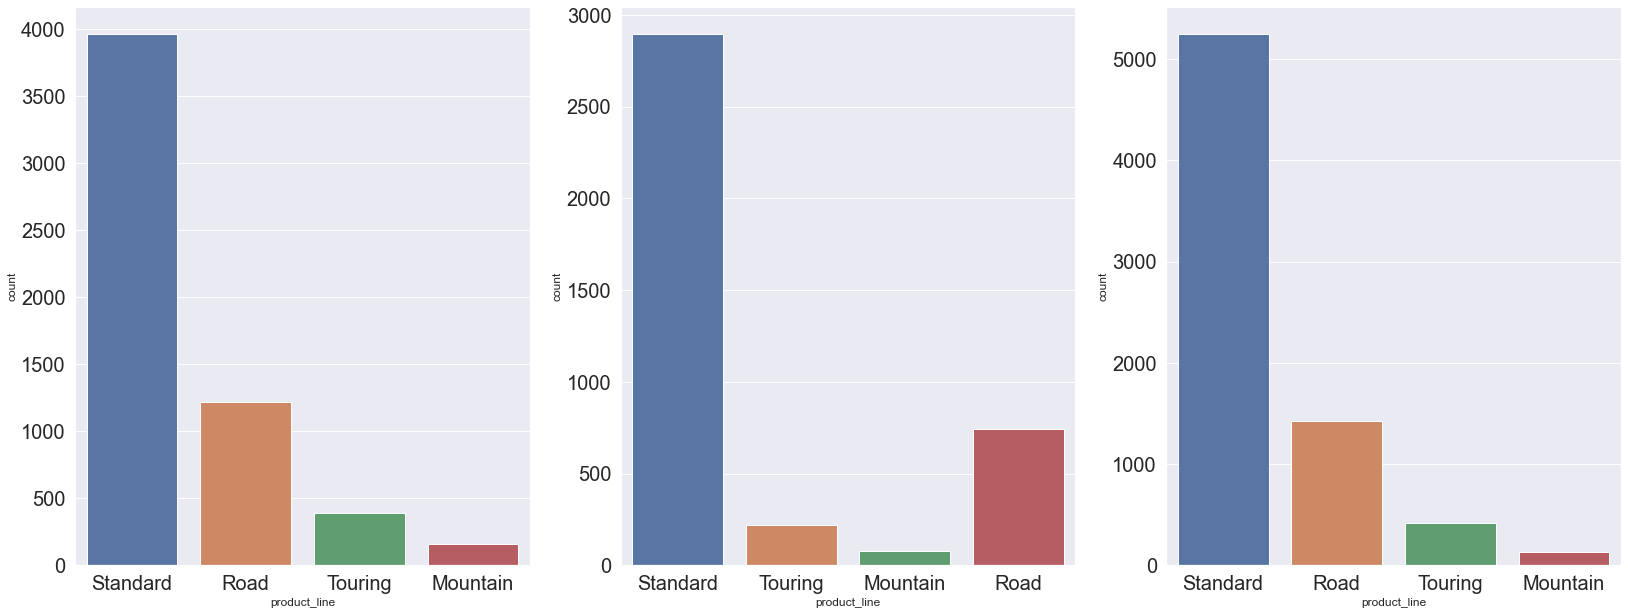

In [162]:
fig, axes = plt.subplots(1,3)
axes[0].tick_params(axis='both', labelsize=20)
axes[1].tick_params(axis='both', labelsize=20)
axes[2].tick_params(axis='both', labelsize=20)
x = 'product_line'
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[0])]
             , ax=axes[0])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[1])]
             , ax=axes[1])
sns.countplot(x = x, data = combined_df[combined_df.customer_id.isin(req_cust_ids[2])]
             , ax=axes[2])

In [163]:
combined_df_vector_summed.loc[:, 'cluster'] = combined_df_vector_summed.cluster.replace({0:'Cat_1',1:'Cat_3',2:'Cat_2'})

In [214]:
combined_df_vector_summed.cluster.value_counts()

Cat_1    1215
Cat_2    1056
Cat_3     412
Name: cluster, dtype: int64

In [219]:
combined_df.head()

,transaction_id,product_id,customer_id,transaction_date,transaction_month,transaction_month_number,online_order,order_status,brand,product_line,...,Age_category_no,job_title_no,job_industry_category_no,wealth_segment_no,deceased_indicator_no,owns_car_no,postcode_no,state_no,property_valuation_no,tenure_no
0,1,2,2950,2017-02-25,Feb,2,False,Approved,Solex,Standard,...,0.071587,0.001837,0.247339,0.501216,0.999568,0.504835,0.002701,0.253876,0.058890,0.050786
1,11065,1,2950,2017-10-16,Oct,10,False,Approved,Giant Bicycles,Standard,...,0.071587,0.001837,0.247339,0.501216,0.999568,0.504835,0.002701,0.253876,0.058890,0.050786
2,18923,62,2950,2017-04-26,Apr,4,False,Approved,Solex,Standard,...,0.071587,0.001837,0.247339,0.501216,0.999568,0.504835,0.002701,0.253876,0.058890,0.050786
3,2,3,3120,2017-05-21,May,5,True,Approved,Trek Bicycles,Standard,...,0.226268,0.009725,0.171592,0.501216,0.999568,0.504835,0.002377,0.533794,0.058782,0.050786
4,6862,4,3120,2017-10-05,Oct,10,False,Approved,Giant Bicycles,Standard,...,0.226268,0.009725,0.171592,0.501216,0.999568,0.504835,0.002377,0.533794,0.058782,0.050786


In [165]:
details_reqd = ['customer_id','gender', 'job_title', 'job_industry_category', 'wealth_segment', 'tenure', 'postcode', 'state',
               'property_valuation', 'Age_category', 'past_3_years_bike_related_purchases_categories', 'cluster']

In [167]:
data_for_fitting_classif_model = combined_df.merge(combined_df_vector_summed[['customer_id', 'cluster']], on='customer_id')[details_reqd].drop_duplicates()
data_for_fitting_classif_model.drop('customer_id', axis = 1, inplace=True)
data_for_fitting_classif_model.head()

,gender,job_title,job_industry_category,wealth_segment,tenure,postcode,state,property_valuation,Age_category,past_3_years_bike_related_purchases_categories,cluster
0,Female,Clinical Specialist,Health,Mass Customer,10.0,2196,NSW,5,35-44,81-90,Cat_2
7,Male,Desktop Support Technician,Retail,Affluent Customer,22.0,2835,NSW,1,45-54,Below 10,Cat_1
13,Male,Staff Scientist,Financial Services,Mass Customer,16.0,2096,NSW,10,55-64,81-90,Cat_2
20,Female,Sales Representative,Retail,Affluent Customer,2.0,2292,NSW,7,25-34,21-30,Cat_3
30,Male,Web Designer II,Property,Affluent Customer,16.0,2153,NSW,10,55-64,Below 10,Cat_2


In [177]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
gender_encoder.fit(data_for_fitting_classif_model['gender'])
data_for_fitting_classif_model['gender'] = gender_encoder.transform(data_for_fitting_classif_model['gender'])

job_encoder = LabelEncoder()
job_encoder.fit(data_for_fitting_classif_model.job_title)
data_for_fitting_classif_model['job_title'] = job_encoder.transform(data_for_fitting_classif_model['job_title'])

industry_encoder = LabelEncoder()
industry_encoder.fit(data_for_fitting_classif_model.job_industry_category)
data_for_fitting_classif_model['job_industry_category'] = industry_encoder.transform(data_for_fitting_classif_model['job_industry_category'])

wealth_encoder = LabelEncoder()
wealth_encoder.fit(data_for_fitting_classif_model.wealth_segment)
data_for_fitting_classif_model['wealth_segment'] = wealth_encoder.transform(data_for_fitting_classif_model['wealth_segment'])

state_encoder = LabelEncoder()
state_encoder.fit(data_for_fitting_classif_model.state)
data_for_fitting_classif_model['state'] = state_encoder.transform(data_for_fitting_classif_model['state'])

age_encoder = LabelEncoder()
age_encoder.fit(data_for_fitting_classif_model.Age_category)
data_for_fitting_classif_model['Age_category'] = age_encoder.transform(data_for_fitting_classif_model['Age_category'])

purchase_encoder = LabelEncoder()
purchase_encoder.fit(data_for_fitting_classif_model.past_3_years_bike_related_purchases_categories)
data_for_fitting_classif_model['past_3_years_bike_related_purchases_categories'] = purchase_encoder.transform(data_for_fitting_classif_model['past_3_years_bike_related_purchases_categories'])

In [169]:
data_for_fitting_classif_model.head()

,gender,job_title,job_industry_category,wealth_segment,tenure,postcode,state,property_valuation,Age_category,past_3_years_bike_related_purchases_categories,cluster
0,0,42,3,2,10.0,2196,0,5,2,7,Cat_2
7,1,57,7,0,22.0,2835,0,1,3,9,Cat_1
13,1,168,2,2,16.0,2096,0,10,4,7,Cat_2
20,0,146,7,0,2.0,2292,0,7,1,1,Cat_3
30,1,188,6,0,16.0,2153,0,10,4,9,Cat_2


In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_for_fitting_classif_model.iloc[:,:-1],
                                                    data_for_fitting_classif_model[['cluster']], test_size=0.2, random_state=0)

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

dec_model = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3, min_samples_leaf=5)

dec_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [180]:
from sklearn.metrics import accuracy_score
predict_cluster = dec_model.predict(X_test)
accuracy_score(y_test, predict_cluster)

0.6070763500931099

In [353]:
data_for_fitting_classif_model = pd.read_csv("Data for classification.csv")
# data_for_fitting_classif_model.drop('customer_id', axis=1, inplace=True)
data_for_fitting_classif_model.shape

(2683, 12)

In [356]:
data_for_fitting_classif_model.customer_id.nunique()

2683

In [366]:
cust_ids = set(combined_df[~combined_df.customer_id.isin(users_with_less_than_4_transactions)].customer_id)
len(cust_ids)

2683

In [348]:
cols = list(data_for_fitting_classif_model.columns[:-1])
cols.append('customer_id')
data_for_fitting_classif_model = data_for_fitting_classif_model.merge(combined_df[cols], how = 'left', on = cols[:-1]).drop_duplicates()

In [367]:
combined_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'transaction_month', 'transaction_month_number', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost', 'gender',
       'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state',
       'property_valuation', 'past_3_years_bike_related_purchases_categories',
       'Age_category', 'list_price_categories', 'transaction_month_no',
       'product_id_no', 'online_order_no', 'order_status_no', 'brand_no',
       'product_line_no', 'product_class_no', 'product_size_no',
       'list_price_categories_no', 'gender_no',
       'past_3_years_bike_related_purchases_categories_no', 'Age_category_no',
       'job_title_no', 'job_industry_category_no', 'wealth_segment_no',
       'deceased_indicator_no', 'owns

In [384]:
cols_reqd = ['customer_id', 'transaction_month', 'transaction_month_number', 'online_order', 'order_status', 'brand',
             'product_line', 'product_class', 'product_size', 'list_price_categories', 'list_price']
transaction_details = combined_df[cols_reqd]

In [385]:
transaction_details = transaction_details[transaction_details.customer_id.isin(cust_ids)]

In [390]:
combined_table = transaction_details.merge(data_for_fitting_classif_model)

In [400]:
combined_table.groupby(['list_price_categories', "LP"]).count()

customer_id  transaction_month  \
list_price_categories LP                                   
1001-1200             1           169                169   
                      2           156                156   
                      3           285                285   
                      4           200                200   
                      5            94                 94   
...                               ...                ...   
Below 200             7           117                117   
                      8           120                120   
                      9           122                122   
                      10          122                122   
                      11           52                 52   

                          transaction_month_number  online_order  \
list_price_categories LP                                           
1001-1200             1                        169           169   
                      2                        156           156   
                      3                        285           285   
                      4                        200           200   
                      5                         94            94   
...                                            ...           ...   
Below 200             7                        117           117   
                      8                        120           120   
                      9                        122           122   
                      10                       122           122   
                      11                        52            52   

                          order_status  brand  product_line  product_class  \
list_price_categories LP                                                     
1001-1200             1            169    169           169            169   
                      2            156    156           156            156   
                      3            285    285           285            285   
                      4            200    200           200            200   
                      5             94     94            94             94   
...                                ...    ...           ...            ...   
Below 200             7            117    117           117            117   
                      8            120    120           120            120   
                      9            122    122           122            122   
                      10           122    122           122            122   
                      11            52     52            52             52   

                          product_size  list_price  ...  job_title  \
list_price_categories LP                            ...              
1001-1200             1            169         169  ...        169   
                      2            156         156  ...        156   
                      3            285         285  ...        285   
                      4            200         200  ...        200   
                      5             94          94  ...         94   
...                                ...         ...  ...        ...   
Below 200             7            117         117  ...        117   
                      8            120         120  ...        120   
                      9            122         122  ...        122   
                      10           122         122  ...        122   
                      11            52          52  ...         52   

                          job_industry_category  wealth_segment  tenure  \
list_price_categories LP                                                  
1001-1200             1                     169             169     169   
                      2                     156             156     156   
                      3                     285             285     285   
                      4                     200            

In [404]:
combined_table.to_csv("Datasets for Power BI/Combined Data.csv", index=False)

In [249]:
data_for_fitting_classif_model.to_csv("Data for classification.csv", index=False)

In [383]:
combined_df[combined_df.customer_id.isin(cust_ids)][['customer_id', 'list_price']].to_csv("List Price.csv", index=False)

In [402]:
combined_table = pd.read_csv("Datasets for Power BI/Combined Data.csv")
combined_table.head()

,customer_id,transaction_month,transaction_month_number,online_order,order_status,brand,product_line,product_class,product_size,list_price_categories,...,job_industry_category,wealth_segment,tenure,postcode,state,property_valuation,Age_category,past_3_years_bike_related_purchases_categories,cluster,LP
0,3120,May,5,True,Approved,Trek Bicycles,Standard,medium,large,Above 2000,...,Health,Mass Customer,10,2196,NSW,5,35-44,81-90,Cat_2,1
1,3120,Oct,10,False,Approved,Giant Bicycles,Standard,high,medium,1001-1200,...,Health,Mass Customer,10,2196,NSW,5,35-44,81-90,Cat_2,8
2,3120,Oct,10,True,Approved,Solex,Standard,medium,medium,Below 200,...,Health,Mass Customer,10,2196,NSW,5,35-44,81-90,Cat_2,3
3,3120,Jan,1,False,Approved,Giant Bicycles,Standard,medium,large,401-600,...,Health,Mass Customer,10,2196,NSW,5,35-44,81-90,Cat_2,11
4,3120,Jan,1,True,Approved,Solex,Standard,medium,medium,1401-1600,...,Health,Mass Customer,10,2196,NSW,5,35-44,81-90,Cat_2,6


In [403]:
def list_price_sort(price):
    categories =  {'Below 200' : 1, '201-400' :2, '401-600':3, '601-800':4, '801-1000':5, '1001-1200':6, '1201-1400':7,
                   '1401-1600':8, '1601-1800':9
                 , '1801-2000':10, 'Above 2000':11}
    return categories[price]
            
combined_table['LP'] = combined_table.list_price_categories.apply(list_price_sort)
combined_table.groupby(['list_price_categories', "LP"]).count()

,,customer_id,transaction_month,transaction_month_number,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,job_title,job_industry_category,wealth_segment,tenure,postcode,state,property_valuation,Age_category,past_3_years_bike_related_purchases_categories,cluster
list_price_categories,LP,,,,,,,,,,,,,,,,,,,,,
1001-1200,6,2231,2231,2231,2231,2231,2231,2231,2231,2231,2231,...,2231,2231,2231,2231,2231,2231,2231,2231,2231,2231
1201-1400,7,1955,1955,1955,1955,1955,1955,1955,1955,1955,1955,...,1955,1955,1955,1955,1955,1955,1955,1955,1955,1955
1401-1600,8,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716,...,1716,1716,1716,1716,1716,1716,1716,1716,1716,1716
1601-1800,9,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780,...,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780
1801-2000,10,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704,...,1704,1704,1704,1704,1704,1704,1704,1704,1704,1704
201-400,2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,...,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
401-600,3,2171,2171,2171,2171,2171,2171,2171,2171,2171,2171,...,2171,2171,2171,2171,2171,2171,2171,2171,2171,2171
601-800,4,1485,1485,1485,1485,1485,1485,1485,1485,1485,1485,...,1485,1485,1485,1485,1485,1485,1485,1485,1485,1485
801-1000,5,705,705,705,705,705,705,705,705,705,705,...,705,705,705,705,705,705,705,705,705,705


**Random Forest**

In [173]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

C:\Users\joyal\AppData\Local\Temp/ipykernel_644/2255612282.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [174]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,6,7,8,9,10,15,20],
    'min_samples_leaf': [3,4,5,6,7,8,9],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

grid_search.best_score_


Fitting 4 folds for each of 420 candidates, totalling 1680 fits


C:\Users\joyal\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.45433621001139557

In [1143]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=7, n_estimators=50,
                       n_jobs=-1, random_state=42)

**New Customer**

In [468]:
new_customer = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name=2, skiprows=1)

C:\Users\joyal\AppData\Local\Temp/ipykernel_644/3370334847.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  new_customer = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name=2, skiprows=1)


In [469]:
import datetime 

new_customer["Age"] = (datetime.datetime.now() - new_customer["DOB"]).astype('<m8[Y]')
age = new_customer.pop("Age")
new_customer.insert(4, "Age", age)

In [470]:
new_customer['Age_category'] = new_customer.Age.apply(age_category)

In [471]:
new_customer['past_3_years_bike_related_purchases_categories'] = new_customer.past_3_years_bike_related_purchases.apply(bike_related_purchases)

In [472]:
new_customer[details_reqd[1:-1]].isna().sum()

gender                                              0
job_title                                         106
job_industry_category                             165
wealth_segment                                      0
tenure                                              0
postcode                                            0
state                                               0
property_valuation                                  0
Age_category                                       17
past_3_years_bike_related_purchases_categories      0
dtype: int64

In [473]:
deleted_rows = new_customer[new_customer.Age_category.isna()]
deleted_rows.shape

(17, 26)

In [474]:
new_customer = new_customer[~new_customer.Age_category.isna()]

Imputation of job industry categories

In [475]:
new_customer['job_industry_category'] = new_customer.apply(job_industry, axis = 1)

In [476]:
new_customer.loc[new_customer['job_industry_category'].isna()& (~new_customer['job_title'].isna()),:]

,first_name,last_name,gender,past_3_years_bike_related_purchases,Age,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Age_category,past_3_years_bike_related_purchases_categories
85,Pietra,Buckleigh,Female,9,73.0,1949-04-29,Engineer III,NaN,High Net Worth,N,...,10,0.48,0.4800,0.600000,0.600000,85,85,1.325000,Above 64,Below 10
108,Aridatha,Sephton,Female,95,61.0,1961-10-22,Human Resources Assistant II,NaN,Mass Customer,N,...,1,0.93,0.9300,1.162500,0.988125,104,104,1.287500,55-64,Above 90
290,Vittoria,Whitney,Female,95,41.0,1981-06-03,Research Assistant I,NaN,High Net Worth,N,...,11,1.07,1.0700,1.337500,1.337500,291,291,1.035937,35-44,Above 90
483,Huberto,Mollatt,Male,82,61.0,1961-08-27,Programmer IV,NaN,Mass Customer,N,...,7,0.93,1.1625,1.453125,1.235156,483,483,0.876563,55-64,81-90


In [477]:
cust_demo[cust_demo.job_title == 'Engineer III'].job_industry_category.value_counts().index[0]

'Manufacturing'

In [478]:
new_customer.loc[new_customer['job_industry_category'].isna()& (~new_customer['job_title'].isna()) & 
                 (new_customer['job_title'] == 'Engineer III'),'job_industry_category'] = 'Manufacturing'

In [479]:
cust_demo[cust_demo.job_title == 'Human Resources Assistant II'].job_industry_category.value_counts().index[0]

'Manufacturing'

In [480]:
new_customer.loc[new_customer['job_industry_category'].isna()& (~new_customer['job_title'].isna()) & 
                 (new_customer['job_title'] == 'Human Resources Assistant II'),'job_industry_category'] = 'Manufacturing'

In [481]:
cust_demo[cust_demo.job_title == 'Research Assistant I'].job_industry_category.value_counts().index[0]

'Manufacturing'

In [482]:
new_customer.loc[new_customer['job_industry_category'].isna()& (~new_customer['job_title'].isna()) & 
                 (new_customer['job_title'] == 'Research Assistant I'),'job_industry_category'] = 'Manufacturing'

In [483]:
cust_demo[cust_demo.job_title == 'Programmer IV'].job_industry_category.value_counts().index[0]

'Manufacturing'

In [484]:
new_customer.loc[new_customer['job_industry_category'].isna()& (~new_customer['job_title'].isna()) & 
                 (new_customer['job_title'] == 'Programmer IV'),'job_industry_category'] = 'Manufacturing'

In [485]:
deleted_rows = deleted_rows.append(new_customer[new_customer.job_industry_category.isna()])
deleted_rows.shape

(39, 26)

In [486]:
new_customer = new_customer[~new_customer.job_industry_category.isna()]

In [487]:
new_customer['job_title'] = new_customer.apply(job_title, axis = 1)

**All imputations are done for new customer**

In [488]:
new_customer['gender'] = gender_encoder.transform(new_customer['gender'])

new_customer['job_title'] = job_encoder.transform(new_customer['job_title'])

new_customer['job_industry_category'] = industry_encoder.transform(new_customer['job_industry_category'])

new_customer['wealth_segment'] = wealth_encoder.transform(new_customer['wealth_segment'])

new_customer['state'] = state_encoder.transform(new_customer['state'])

new_customer['Age_category'] = age_encoder.transform(new_customer['Age_category'])

new_customer['past_3_years_bike_related_purchases_categories'] = purchase_encoder.transform(new_customer['past_3_years_bike_related_purchases_categories'])

In [489]:
new_customer[details_reqd[1:-1]].isna().sum()

gender                                            0
job_title                                         0
job_industry_category                             0
wealth_segment                                    0
tenure                                            0
postcode                                          0
state                                             0
property_valuation                                0
Age_category                                      0
past_3_years_bike_related_purchases_categories    0
dtype: int64

In [490]:
new_cust_categories = dec_model.predict(new_customer[details_reqd[1:-1]])

In [491]:
new_customer.loc[:,'cluster'] = new_cust_categories

In [492]:
new_customer.cluster.value_counts()

Cat_1    497
Cat_2    464
Name: cluster, dtype: int64

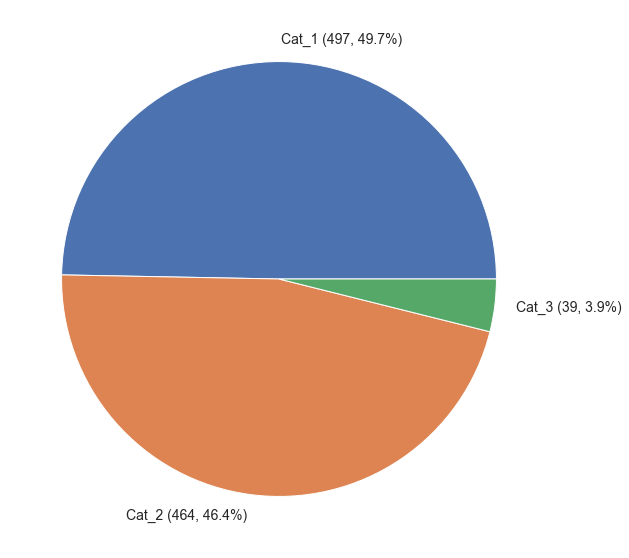

In [205]:
y = np.array([497, 464, 39])
mylabels = ["Cat_1 (497, 49.7%)", "Cat_2 (464, 46.4%)", "Cat_3 (39, 3.9%)"]
plt.figure(figsize=(13,10))
plt.pie(y, labels = mylabels, textprops={'fontsize': 14})
plt.show() 

In [493]:
new_customer['gender'] = gender_encoder.inverse_transform(new_customer['gender'])

new_customer['job_title'] = job_encoder.inverse_transform(new_customer['job_title'])

new_customer['job_industry_category'] = industry_encoder.inverse_transform(new_customer['job_industry_category'])

new_customer['wealth_segment'] = wealth_encoder.inverse_transform(new_customer['wealth_segment'])

new_customer['state'] = state_encoder.inverse_transform(new_customer['state'])

new_customer['Age_category'] = age_encoder.inverse_transform(new_customer['Age_category'])

new_customer['past_3_years_bike_related_purchases_categories'] = purchase_encoder.inverse_transform(new_customer['past_3_years_bike_related_purchases_categories'])

In [494]:
new_customer.shape

(961, 27)

In [495]:
new_cust_cols = ['first_name', 'last_name', 'gender', 'Age_category', 'past_3_years_bike_related_purchases_categories',
                 'cluster', 'job_title','job_industry_category', 'wealth_segment', 'deceased_indicator',
                 'owns_car', 'tenure', 'postcode', 'state', 'property_valuation']

In [496]:
new_customer[new_cust_cols].head()

,first_name,last_name,gender,Age_category,past_3_years_bike_related_purchases_categories,cluster,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation
0,Chickie,Brister,Male,Above 64,81-90,Cat_2,General Manager,Manufacturing,Mass Customer,N,Yes,14,4500,QLD,6
1,Morly,Genery,Male,45-54,61-70,Cat_1,Structural Engineer,Property,Mass Customer,N,No,16,2113,NSW,11
2,Ardelis,Forrester,Female,45-54,Below 10,Cat_2,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,3505,VIC,5
3,Lucine,Stutt,Female,35-44,61-70,Cat_2,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,4814,QLD,1
4,Melinda,Hadlee,Female,55-64,31-40,Cat_1,Financial Analyst,Financial Services,Affluent Customer,N,No,19,2093,NSW,9


In [497]:
deleted_rows['cluster'] = 'Cat_3'
new_customer = new_customer.append(deleted_rows)
new_customer.cluster.value_counts()

Cat_1    497
Cat_2    464
Cat_3     39
Name: cluster, dtype: int64

In [498]:
new_customer.loc[new_customer.gender == 'U', 'gender'] = 'Female'

In [504]:
new_customer.loc[new_customer.job_industry_category.isna(), ['job_industry_category', 'job_title']] = "Unspecified"

In [506]:
new_customer.loc[new_customer.Age_category.isna(), 'Age_category'] = 'Unspecified'

In [507]:
new_customer[new_cust_cols].to_csv("Datasets for Power BI/New Customers.csv", index=False)

In [509]:
combined_df.list_price_categories.value_counts()

1001-1200     2451
401-600       2377
1201-1400     2149
1601-1800     1961
1401-1600     1870
1801-2000     1859
601-800       1626
201-400       1362
Below 200     1278
Above 2000     807
801-1000       769
Name: list_price_categories, dtype: int64

In [510]:
2451/18509

0.13242206494137987

In [513]:
new_customer[new_customer.first_name == 'Morly']

,first_name,last_name,gender,past_3_years_bike_related_purchases,Age,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Age_category,past_3_years_bike_related_purchases_categories,cluster
1,Morly,Genery,Male,69,53.0,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,0.89,0.89,1.1125,0.945625,1,1,1.71875,45-54,61-70,Cat_1
